# **Differentiated Thyroid Cancer Recurrence**

## Group 2
### Abogado, Marxel S.
### Surban, Alyssa Nicole J.
### Tan, Jamilene Arianna L.
---

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats


In [281]:
# Load the data
file_path = 'Thyroid_Diff.csv'
df = pd.read_csv(file_path)

### I. **Preprocessing**

#### A. **Data cleaning**

In [282]:
def check_missing_values(df):
    print("Missing Values Analysis:")
    print("-" * 50)
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])
    print("\nTotal missing values:", df.isnull().sum().sum())
    return missing_values

def check_duplicates(df):
    print("\nDuplicate Rows Analysis:")
    print("-" * 50)
    num_duplicates = df.duplicated().sum()
    print("Number of duplicate rows:", num_duplicates)

    if num_duplicates > 0:
        print("\nFirst few duplicate rows:")
        display(df[df.duplicated(keep=False)].sort_values(by=df.columns[0]).head())

    return num_duplicates

In [283]:
def analyze_categorical_variables(df):
    """Analyze categorical variables and create visualizations."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Print value counts and percentages
        print(f"\nValue counts and percentages for {col}:")
        value_percent = (df[col].value_counts(normalize=True) * 100).round(2)
        summary = pd.DataFrame({
            'Count': df[col].value_counts(),
            'Percentage': value_percent
        })
        print(summary)
        
        # Check relationship with target variable (Recurred)
        if col != 'Recurred':
            plt.figure(figsize=(12, 6))
            pd.crosstab(df[col], df['Recurred'], normalize='index').plot(kind='bar')
            plt.title(f'{col} vs Recurrence Rate')
            plt.tight_layout()
            plt.show()

def analyze_numerical_variables(df):
    """Analyze numerical variables and create visualizations."""
    numerical_cols = ['Age']  # Only Age is truly numerical in this dataset
    
    # Create histograms and boxplots
    for col in numerical_cols:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Histogram
        sns.histplot(data=df, x=col, ax=ax1)
        ax1.set_title(f'Distribution of {col}')
        
        # Boxplot by recurrence
        sns.boxplot(data=df, x='Recurred', y=col, ax=ax2)
        ax2.set_title(f'{col} by Recurrence Status')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\nSummary statistics for {col}:")
        print(df[col].describe())

In [284]:
check_missing_values(df)
if check_duplicates(df) > 0:
    df = df.drop_duplicates()
    print("Duplicate rows removed.")

Missing Values Analysis:
--------------------------------------------------
Series([], dtype: int64)

Total missing values: 0

Duplicate Rows Analysis:
--------------------------------------------------
Number of duplicate rows: 19

First few duplicate rows:


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
168,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
136,21,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
196,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
161,22,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
121,26,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No


Duplicate rows removed.


#### B. **Exploratory data analysis**

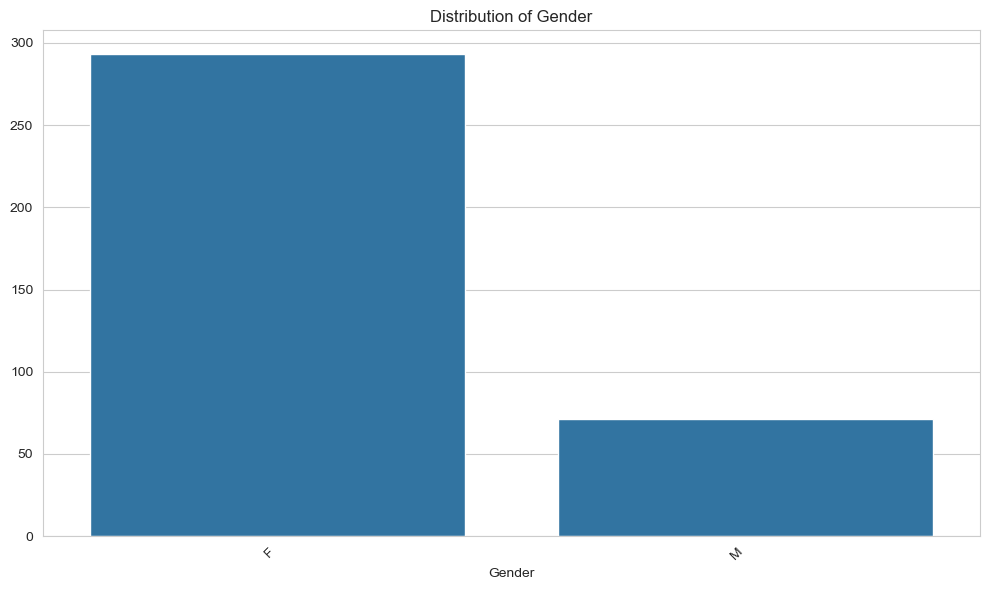


Value counts and percentages for Gender:
        Count  Percentage
Gender                   
F         293       80.49
M          71       19.51


<Figure size 1200x600 with 0 Axes>

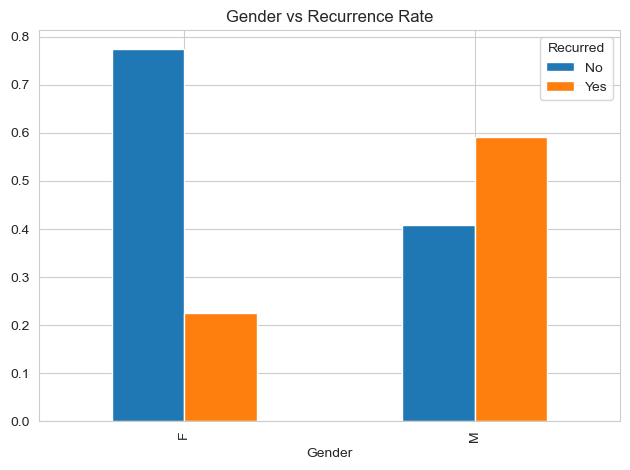

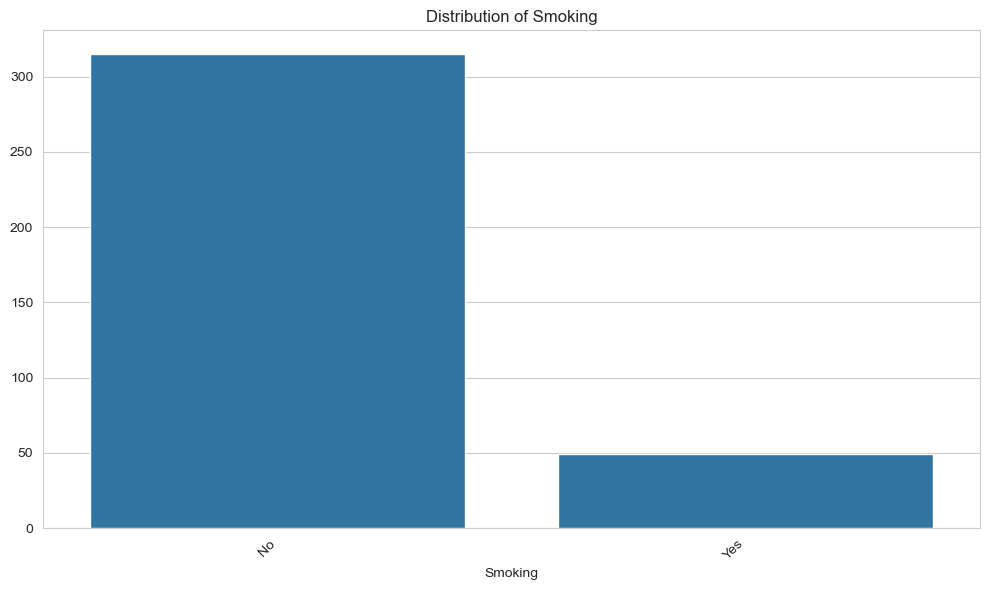


Value counts and percentages for Smoking:
         Count  Percentage
Smoking                   
No         315       86.54
Yes         49       13.46


<Figure size 1200x600 with 0 Axes>

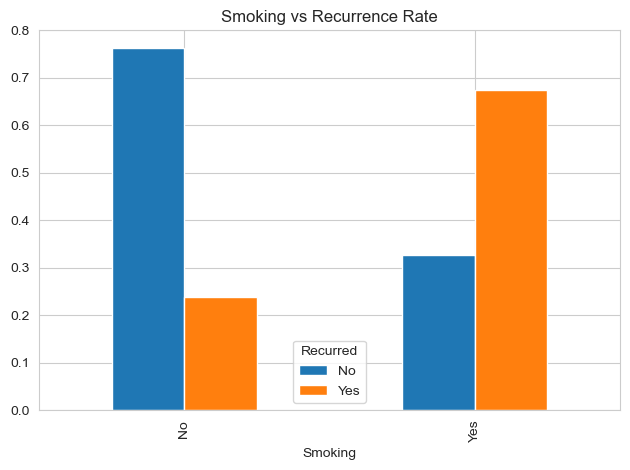

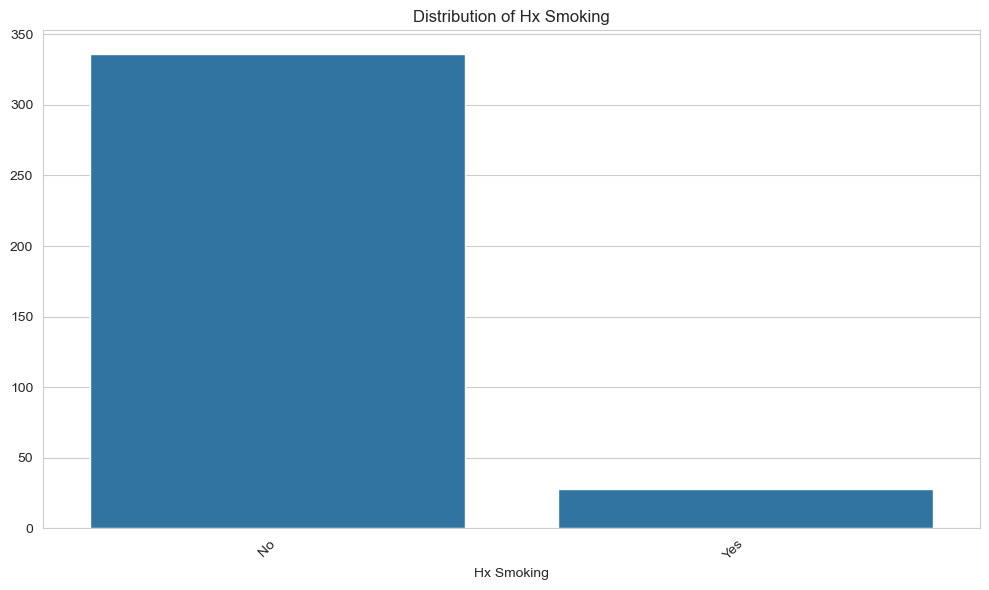


Value counts and percentages for Hx Smoking:
            Count  Percentage
Hx Smoking                   
No            336       92.31
Yes            28        7.69


<Figure size 1200x600 with 0 Axes>

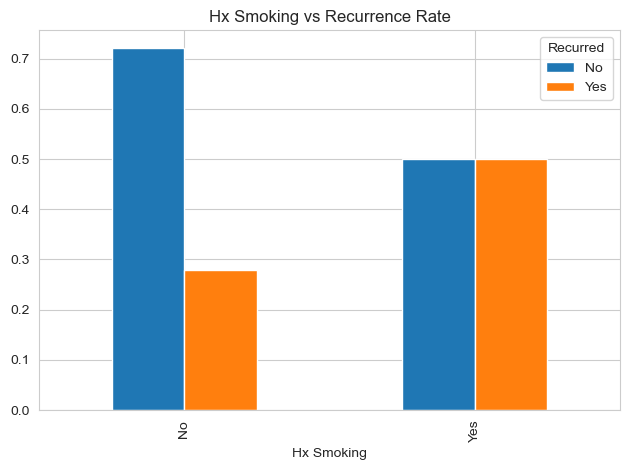

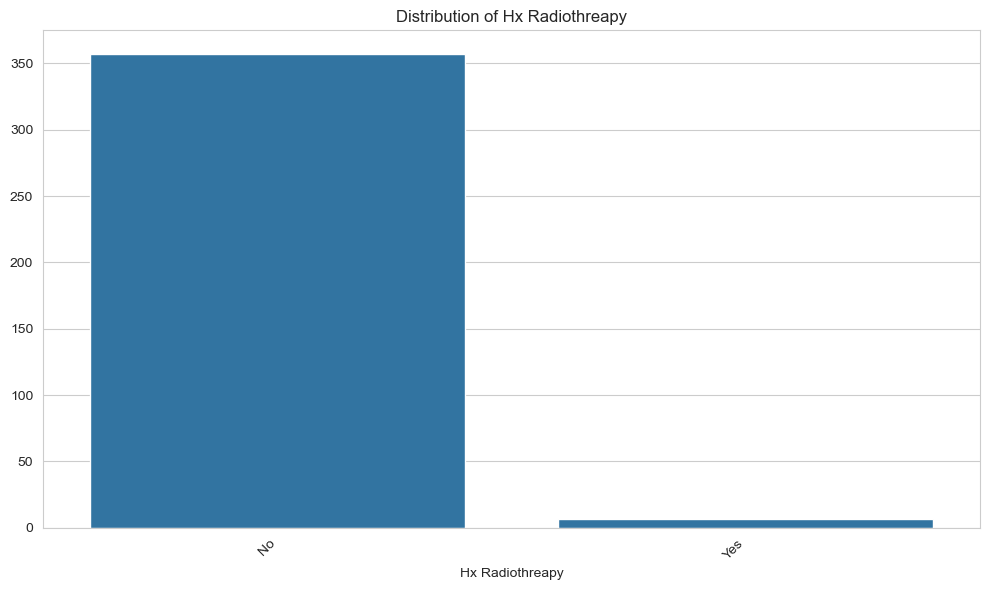


Value counts and percentages for Hx Radiothreapy:
                 Count  Percentage
Hx Radiothreapy                   
No                 357       98.08
Yes                  7        1.92


<Figure size 1200x600 with 0 Axes>

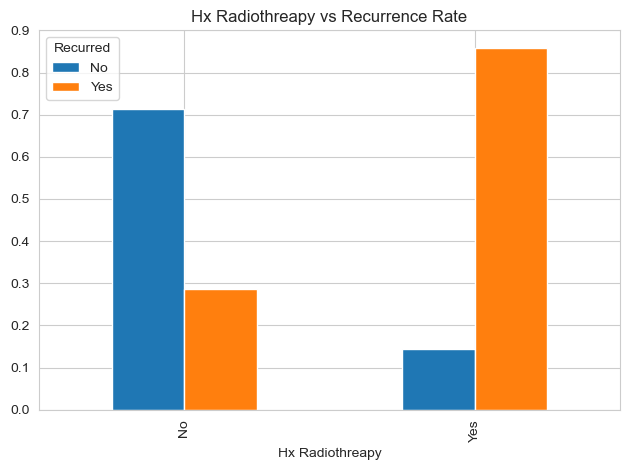

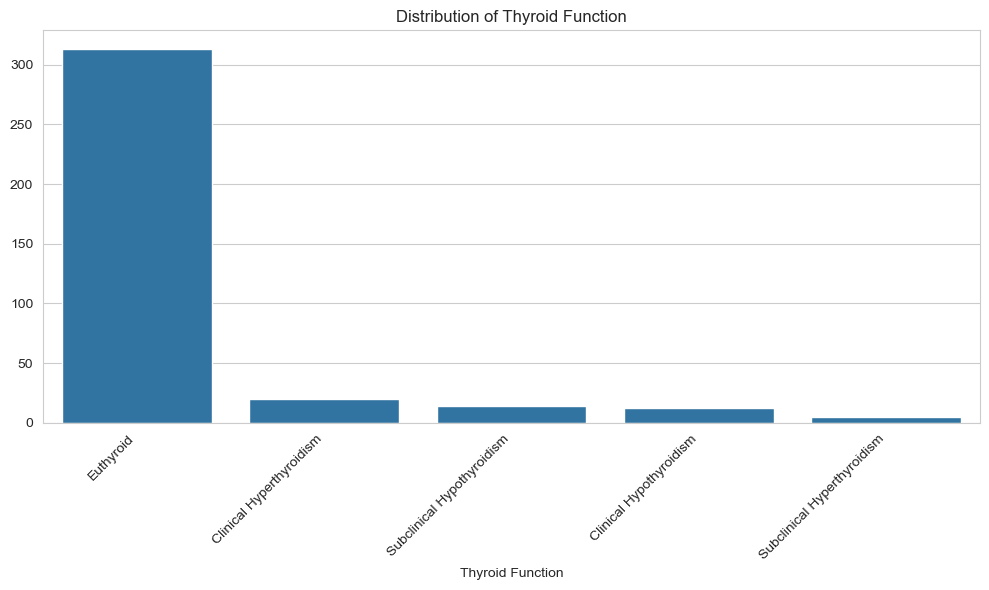


Value counts and percentages for Thyroid Function:
                             Count  Percentage
Thyroid Function                              
Euthyroid                      313       85.99
Clinical Hyperthyroidism        20        5.49
Subclinical Hypothyroidism      14        3.85
Clinical Hypothyroidism         12        3.30
Subclinical Hyperthyroidism      5        1.37


<Figure size 1200x600 with 0 Axes>

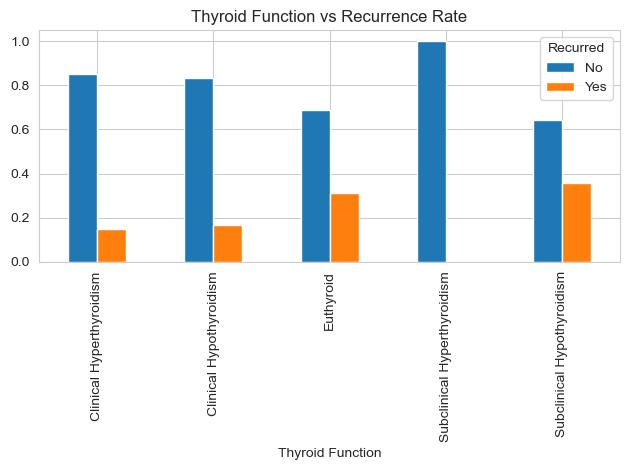

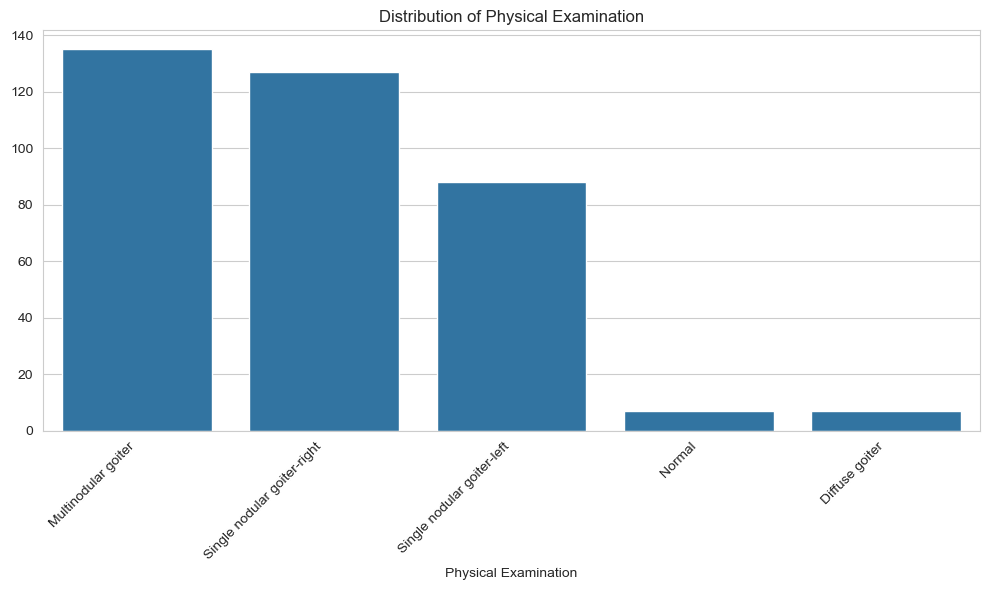


Value counts and percentages for Physical Examination:
                             Count  Percentage
Physical Examination                          
Multinodular goiter            135       37.09
Single nodular goiter-right    127       34.89
Single nodular goiter-left      88       24.18
Normal                           7        1.92
Diffuse goiter                   7        1.92


<Figure size 1200x600 with 0 Axes>

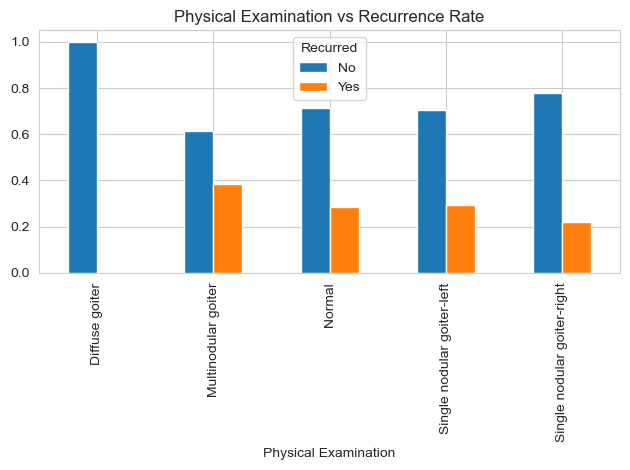

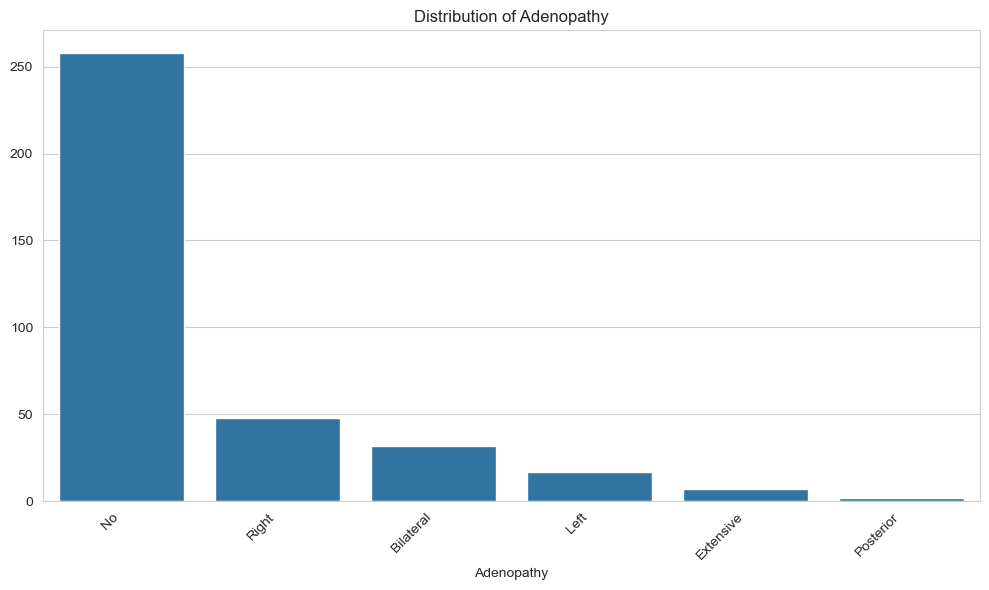


Value counts and percentages for Adenopathy:
            Count  Percentage
Adenopathy                   
No            258       70.88
Right          48       13.19
Bilateral      32        8.79
Left           17        4.67
Extensive       7        1.92
Posterior       2        0.55


<Figure size 1200x600 with 0 Axes>

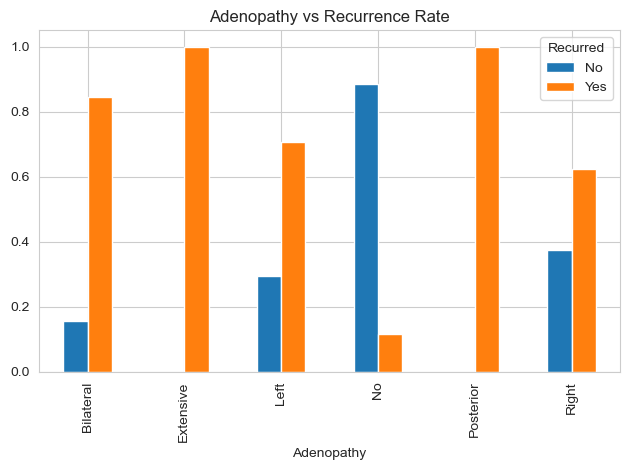

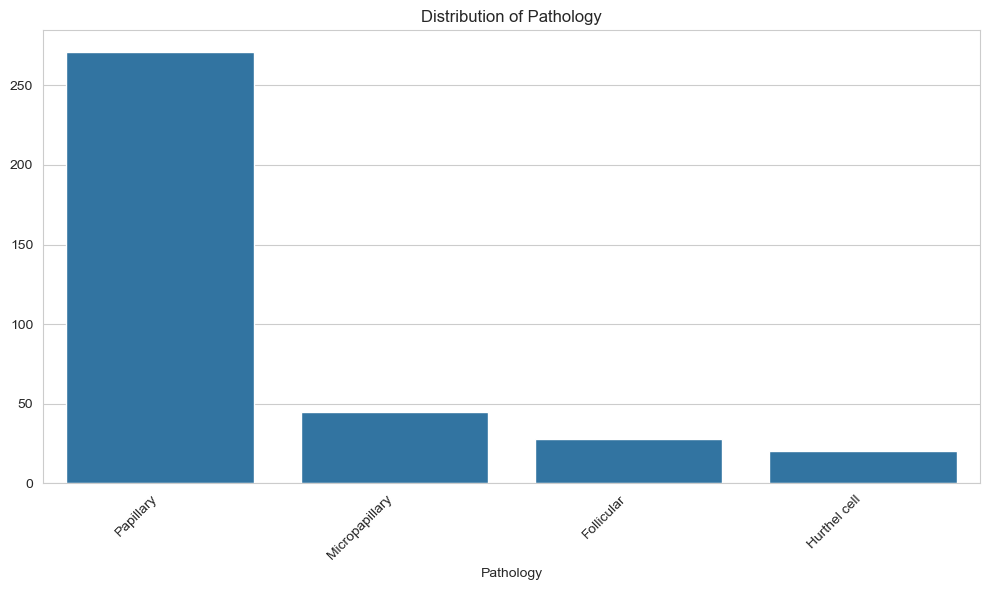


Value counts and percentages for Pathology:
                Count  Percentage
Pathology                        
Papillary         271       74.45
Micropapillary     45       12.36
Follicular         28        7.69
Hurthel cell       20        5.49


<Figure size 1200x600 with 0 Axes>

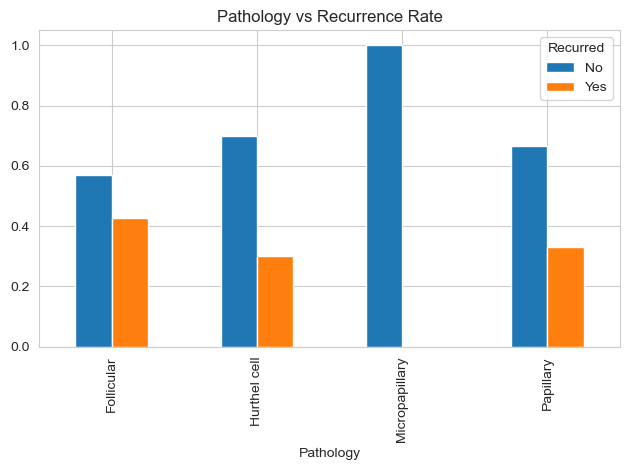

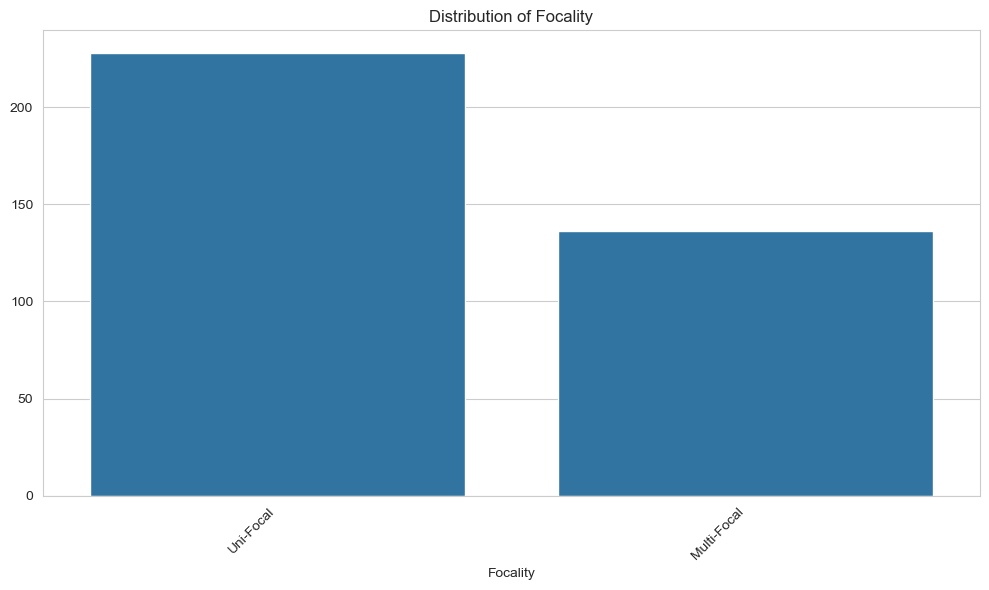


Value counts and percentages for Focality:
             Count  Percentage
Focality                      
Uni-Focal      228       62.64
Multi-Focal    136       37.36


<Figure size 1200x600 with 0 Axes>

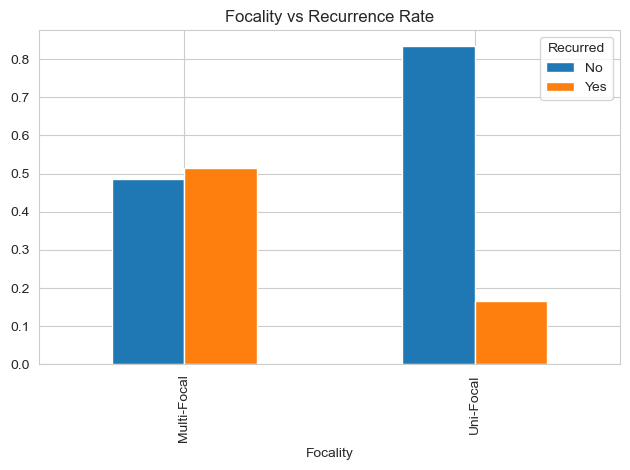

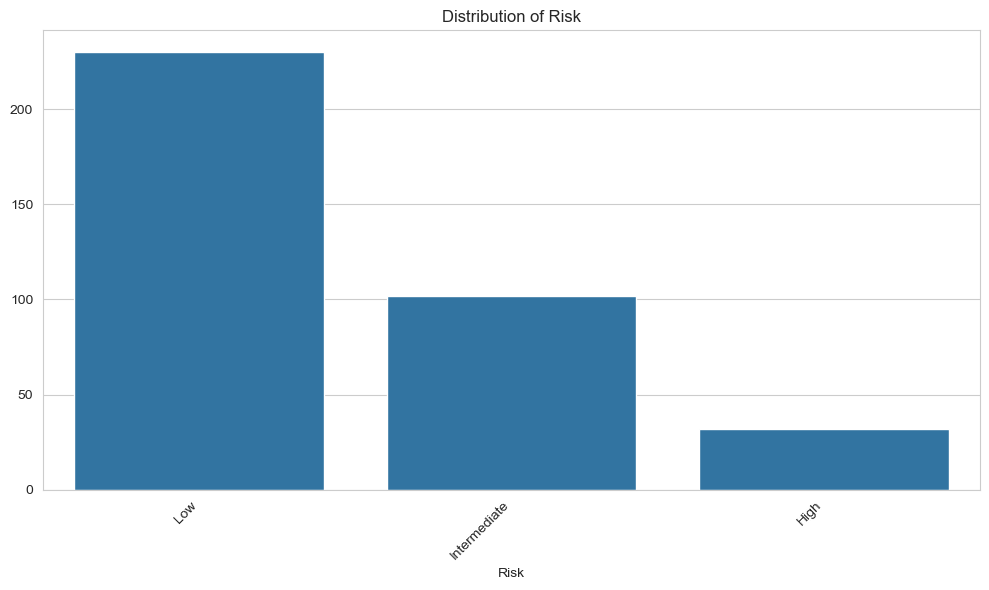


Value counts and percentages for Risk:
              Count  Percentage
Risk                           
Low             230       63.19
Intermediate    102       28.02
High             32        8.79


<Figure size 1200x600 with 0 Axes>

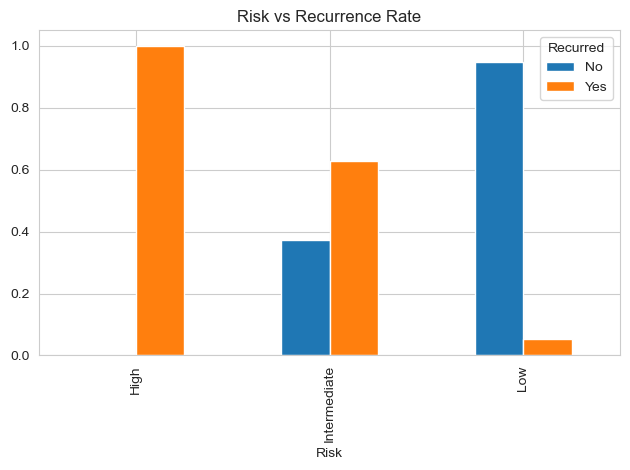

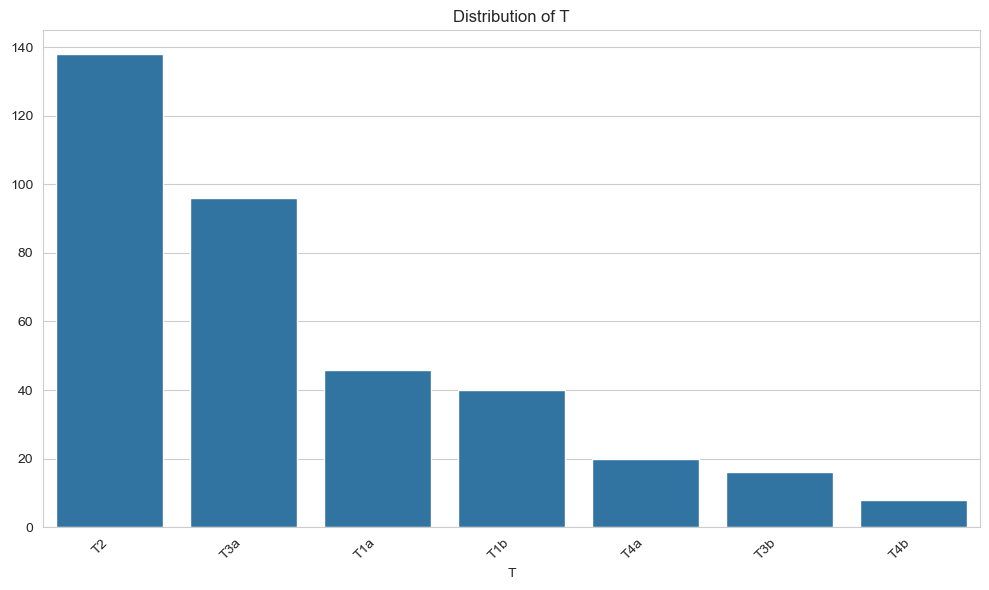


Value counts and percentages for T:
     Count  Percentage
T                     
T2     138       37.91
T3a     96       26.37
T1a     46       12.64
T1b     40       10.99
T4a     20        5.49
T3b     16        4.40
T4b      8        2.20


<Figure size 1200x600 with 0 Axes>

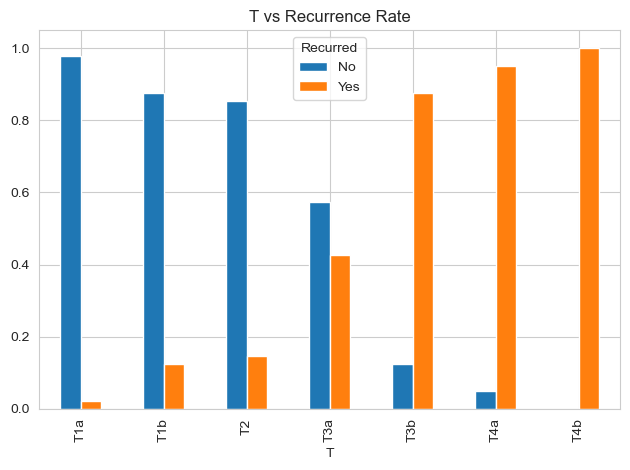

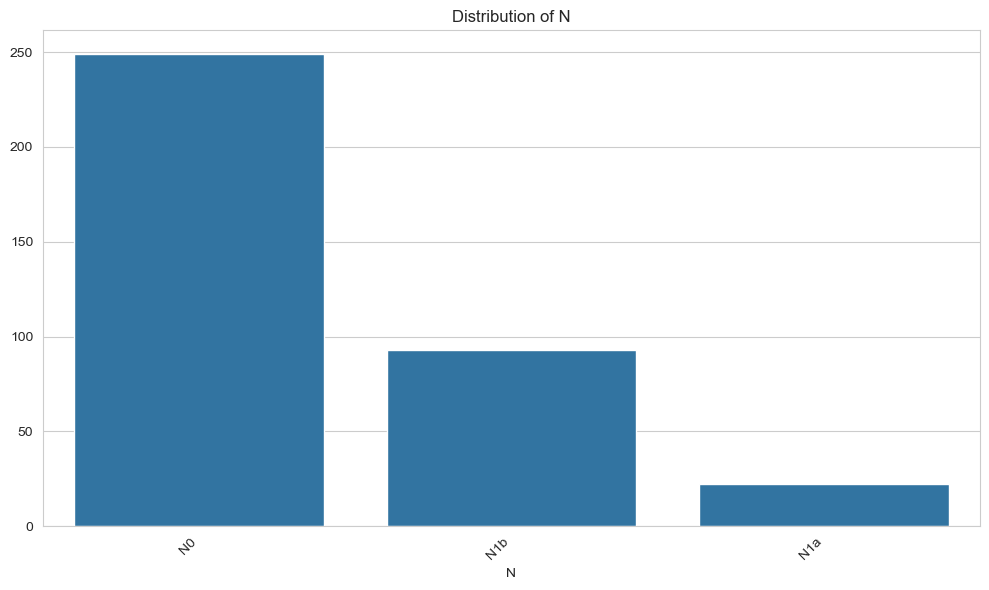


Value counts and percentages for N:
     Count  Percentage
N                     
N0     249       68.41
N1b     93       25.55
N1a     22        6.04


<Figure size 1200x600 with 0 Axes>

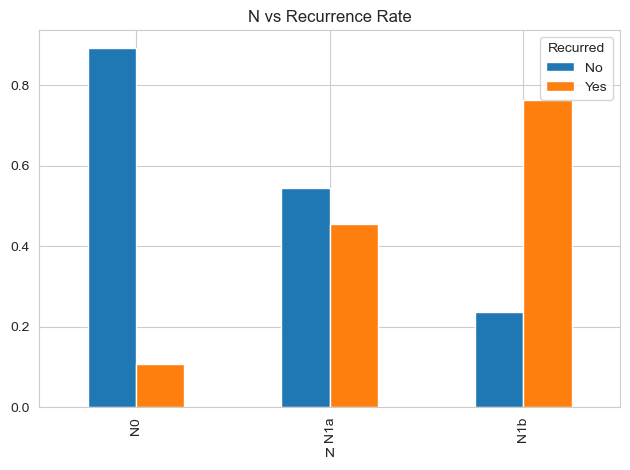

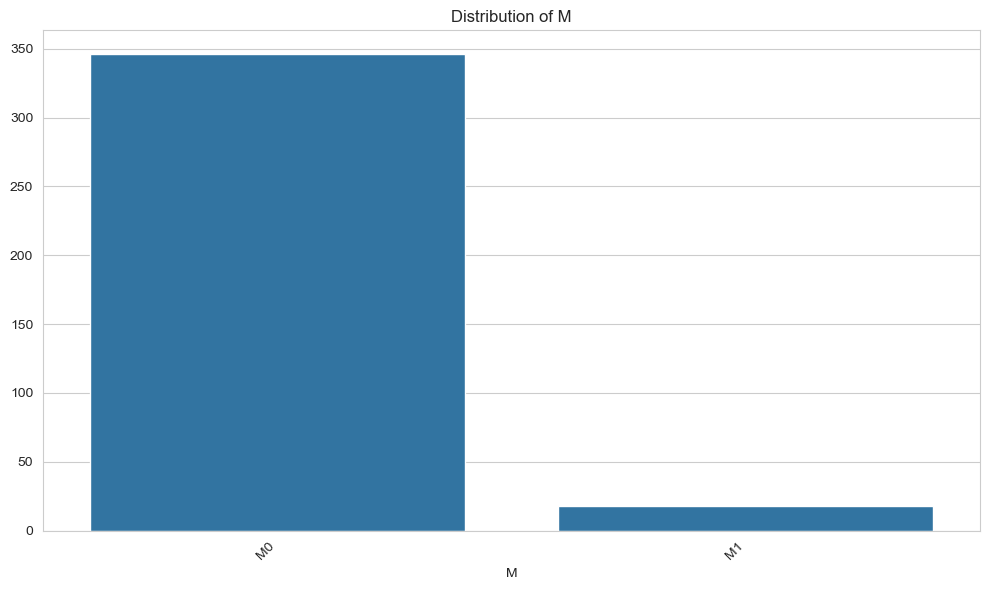


Value counts and percentages for M:
    Count  Percentage
M                    
M0    346       95.05
M1     18        4.95


<Figure size 1200x600 with 0 Axes>

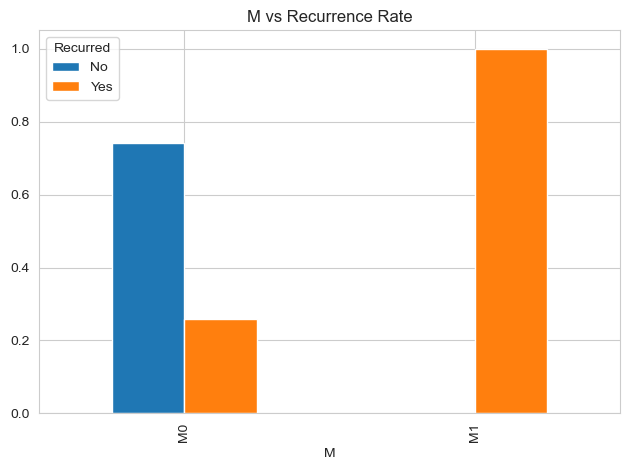

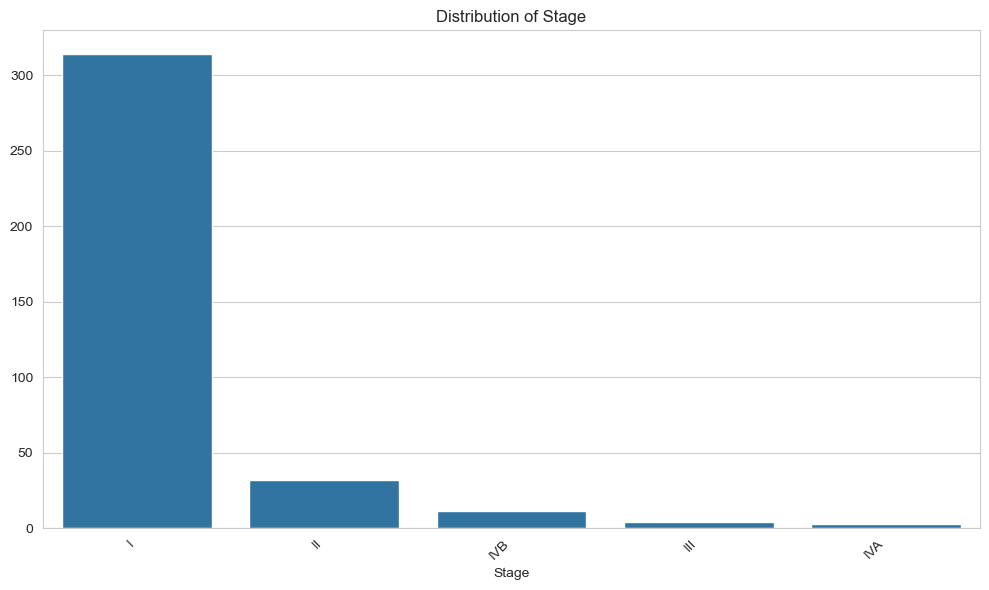


Value counts and percentages for Stage:
       Count  Percentage
Stage                   
I        314       86.26
II        32        8.79
IVB       11        3.02
III        4        1.10
IVA        3        0.82


<Figure size 1200x600 with 0 Axes>

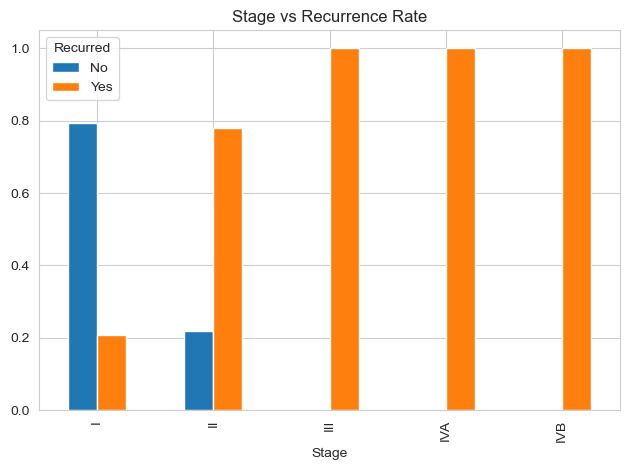

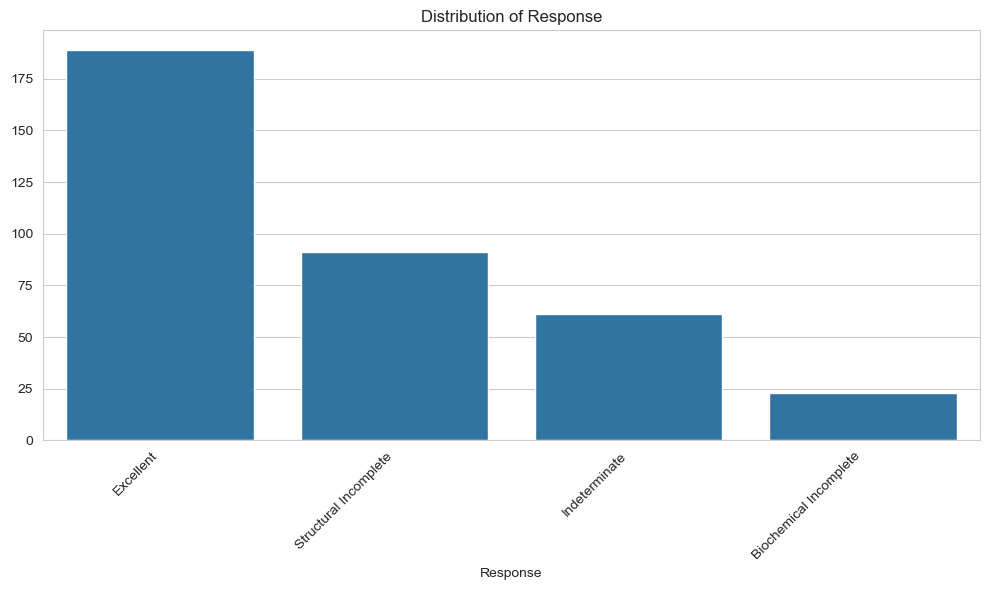


Value counts and percentages for Response:
                        Count  Percentage
Response                                 
Excellent                 189       51.92
Structural Incomplete      91       25.00
Indeterminate              61       16.76
Biochemical Incomplete     23        6.32


<Figure size 1200x600 with 0 Axes>

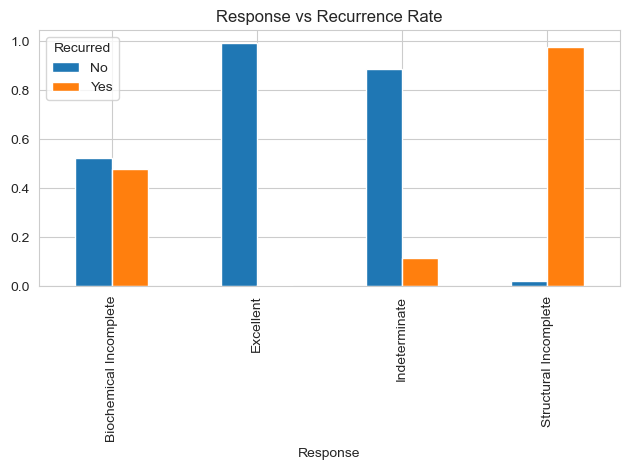

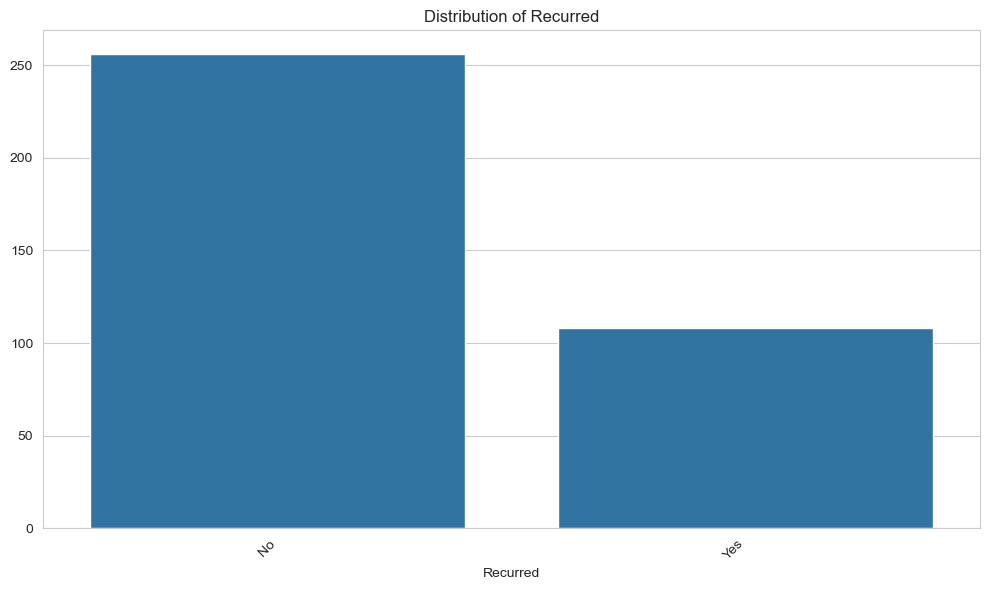


Value counts and percentages for Recurred:
          Count  Percentage
Recurred                   
No          256       70.33
Yes         108       29.67


In [285]:
# Analyze categorical variables
analyze_categorical_variables(df)

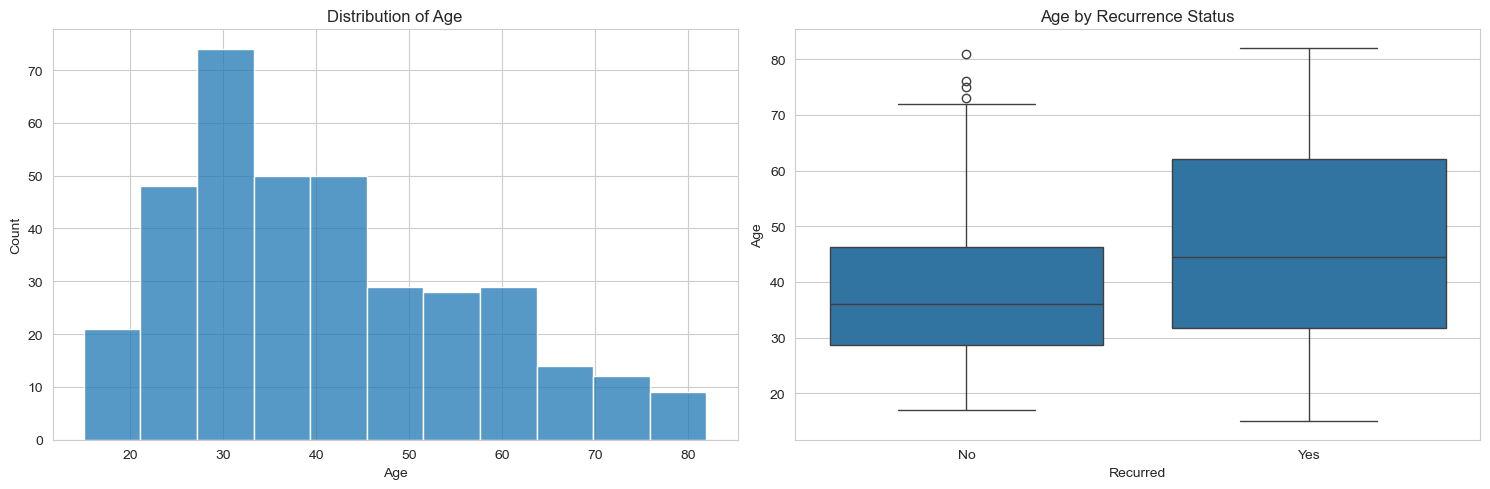


Summary statistics for Age:
count    364.00000
mean      41.25000
std       15.31436
min       15.00000
25%       30.00000
50%       38.00000
75%       52.00000
max       82.00000
Name: Age, dtype: float64


In [286]:
# Analyze numerical variables
analyze_numerical_variables(df)

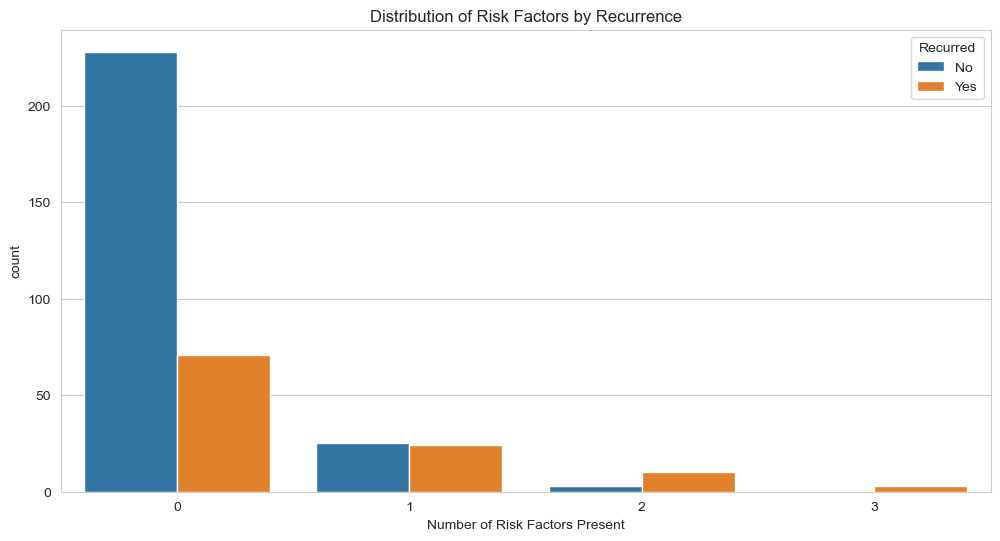


Risk Score Distribution:
Recurred           No         Yes
Risk_Score                       
0           76.254181   23.745819
1           51.020408   48.979592
2           23.076923   76.923077
3            0.000000  100.000000


In [287]:
# Analyze risk factors combination
plt.figure(figsize=(12, 6))
risk_cols = ['Smoking', 'Hx Smoking', 'Hx Radiothreapy']

# Create a combined risk score
df['Risk_Score'] = df[risk_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

# Plot risk score distribution
sns.countplot(data=df, x='Risk_Score', hue='Recurred')
plt.title('Distribution of Risk Factors by Recurrence')
plt.xlabel('Number of Risk Factors Present')
plt.show()

# Print risk score statistics
print("\nRisk Score Distribution:")
print(pd.crosstab(df['Risk_Score'], df['Recurred'], normalize='index') * 100)

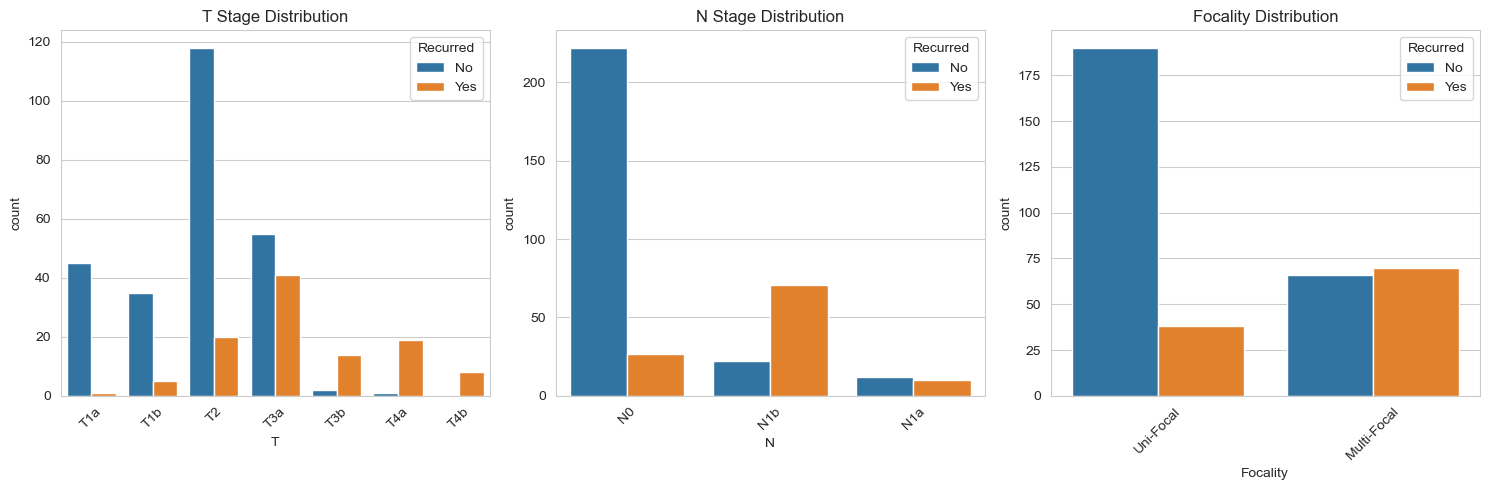


Recurrence rates by TNM combination:
Recurred          No         Yes
T   N                           
T1a N0    100.000000    0.000000
    N1b    50.000000   50.000000
T1b N0     94.444444    5.555556
    N1b    25.000000   75.000000
T2  N0     91.428571    8.571429
    N1a    87.500000   12.500000
    N1b    60.000000   40.000000
T3a N0     83.636364   16.363636
    N1a    50.000000   50.000000
    N1b    15.151515   84.848485
T3b N0     33.333333   66.666667
    N1a    20.000000   80.000000
    N1b     0.000000  100.000000
T4a N0     16.666667   83.333333
    N1a     0.000000  100.000000
    N1b     0.000000  100.000000
T4b N1b     0.000000  100.000000


In [288]:
# Analyze tumor characteristics
plt.figure(figsize=(15, 5))

# T stage distribution by recurrence
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='T', hue='Recurred')
plt.title('T Stage Distribution')
plt.xticks(rotation=45)

# N stage distribution by recurrence
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='N', hue='Recurred')
plt.title('N Stage Distribution')
plt.xticks(rotation=45)

# Focality distribution by recurrence
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Focality', hue='Recurred')
plt.title('Focality Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print recurrence rates by stage combination
print("\nRecurrence rates by TNM combination:")
tnm_recurrence = pd.crosstab([df['T'], df['N']], df['Recurred'], normalize='index') * 100
print(tnm_recurrence)

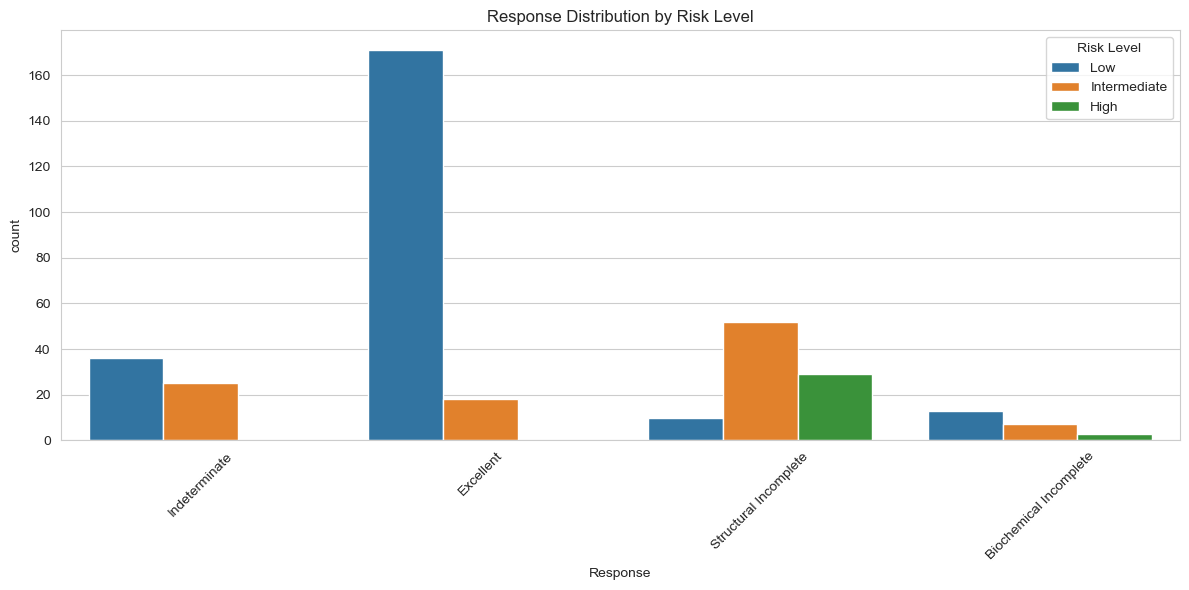


Response patterns by risk level:
Risk                      High  Intermediate        Low
Response                                               
Biochemical Incomplete   9.375      6.862745   5.652174
Excellent                0.000     17.647059  74.347826
Indeterminate            0.000     24.509804  15.652174
Structural Incomplete   90.625     50.980392   4.347826

Recurrence rates by response:
Recurred                       No        Yes
Response                                    
Biochemical Incomplete  52.173913  47.826087
Excellent               99.470899   0.529101
Indeterminate           88.524590  11.475410
Structural Incomplete    2.197802  97.802198


In [289]:
# Analyze response patterns
plt.figure(figsize=(12, 6))

# Response distribution by risk level
sns.countplot(data=df, x='Response', hue='Risk')
plt.title('Response Distribution by Risk Level')
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.tight_layout()
plt.show()

# Calculate response patterns
print("\nResponse patterns by risk level:")
response_by_risk = pd.crosstab(df['Response'], df['Risk'], normalize='columns') * 100
print(response_by_risk)

print("\nRecurrence rates by response:")
recurrence_by_response = pd.crosstab(df['Response'], df['Recurred'], normalize='index') * 100
print(recurrence_by_response)

In [290]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    # Create contingency table
    confusion_matrix = pd.crosstab(x, y)
    
    # Chi2 test
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    
    # Calculate Cramér's V
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))


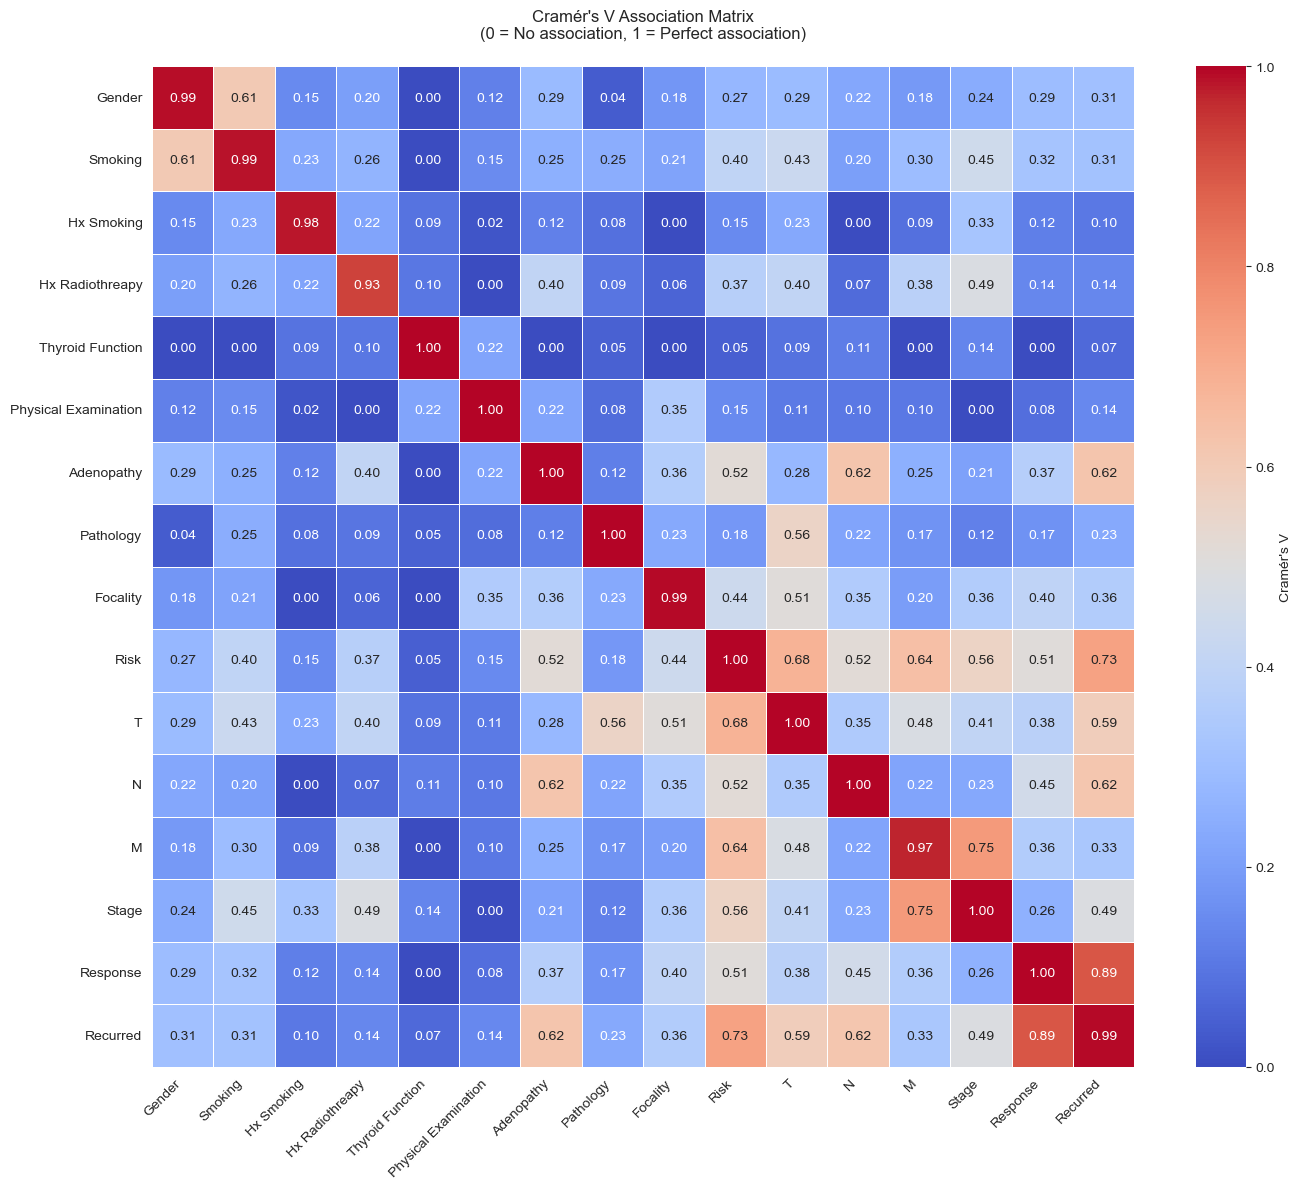


Top 10 Variable Pairs by Association Strength:
Recurred  Response    0.893277
Response  Recurred    0.893277
Stage     M           0.748001
M         Stage       0.748001
Recurred  Risk        0.729593
Risk      Recurred    0.729593
T         Risk        0.682447
Risk      T           0.682447
M         Risk        0.643012
Risk      M           0.643012
dtype: float64

Variables Most Associated with Recurrence:
Response                0.893277
Risk                    0.729593
Adenopathy              0.623005
N                       0.621042
T                       0.586508
Stage                   0.488907
Focality                0.359039
M                       0.333642
Smoking                 0.312538
Gender                  0.306091
Pathology               0.234363
Physical Examination    0.144205
Hx Radiothreapy         0.140605
Hx Smoking              0.104921
Thyroid Function        0.070062
Name: Recurred, dtype: float64


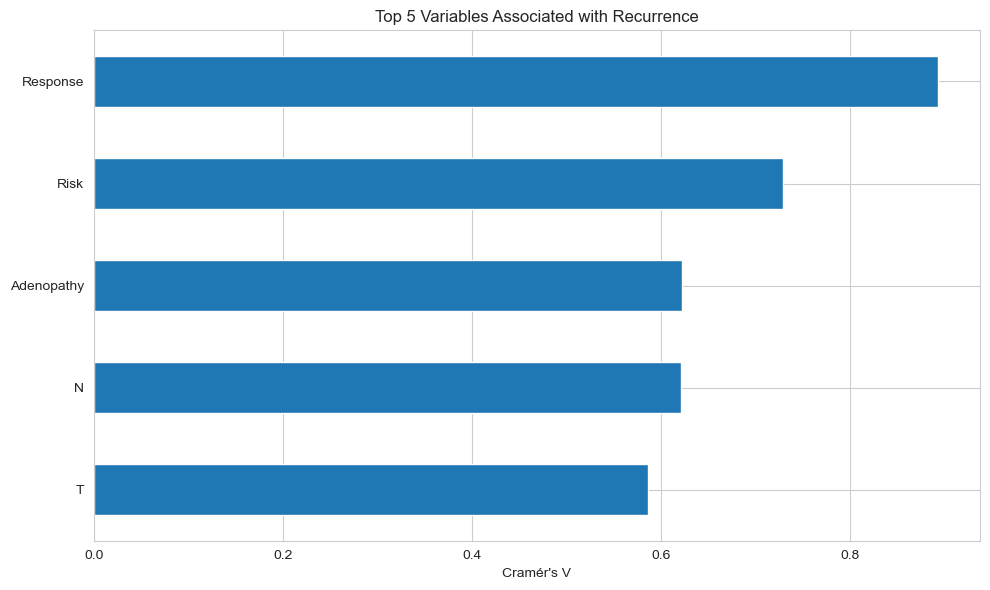

In [291]:
# 2. Select only categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
n_vars = len(categorical_cols)

# 3. Create a matrix to store Cramér's V values
cramers_matrix = pd.DataFrame(np.zeros((n_vars, n_vars)), 
                             index=categorical_cols, 
                             columns=categorical_cols)

# 4. Fill the matrix with Cramér's V values
for i in range(n_vars):
    for j in range(n_vars):
        cramers_matrix.iloc[i, j] = cramers_v(df[categorical_cols[i]], df[categorical_cols[j]])

# 5. Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=0, 
            vmax=1,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': "Cramér's V"})

plt.title("Cramér's V Association Matrix\n(0 = No association, 1 = Perfect association)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6. Get top associations (excluding diagonal)
cramers_series = cramers_matrix.unstack()
cramers_series = cramers_series[cramers_series.index.get_level_values(0) != cramers_series.index.get_level_values(1)]
cramers_series = cramers_series.sort_values(ascending=False)

print("\nTop 10 Variable Pairs by Association Strength:")
print(cramers_series.head(10))

# 7. Check for variables strongly associated with the target
if 'Recurred' in categorical_cols:
    target_associations = cramers_matrix['Recurred'].sort_values(ascending=False)
    print("\nVariables Most Associated with Recurrence:")
    print(target_associations[1:])  # Exclude self-correlation
    
    # 8. Plot top 5 variables associated with Recurred
    top_5 = target_associations[1:6]  # Exclude self-correlation
    plt.figure(figsize=(10, 6))
    top_5.sort_values().plot(kind='barh')
    plt.title('Top 5 Variables Associated with Recurrence')
    plt.xlabel("Cramér's V")
    plt.tight_layout()
    plt.show()

#### C. **Feature selection and SMOTE**

In [292]:
# One-hot encode all categorical variables
y = df['Recurred'].map({'No': 0, 'Yes': 1})
X = df.drop('Recurred', axis=1)
X_enc = pd.get_dummies(X, drop_first=True)

In [293]:
# Split full encoded dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_enc, y, test_size=0.3, stratify=y, random_state=42
)

In [294]:
# Have a data frame with no feature selection

# load df, ensure df['Recurred'] is No/Yes
X = df.drop('Recurred', axis=1)
y = df['Recurred'].map({'No':0, 'Yes':1})

# one-hot encode all categoricals
X_enc = pd.get_dummies(X, drop_first=True)

# 1) No feature selection
df_no_fs = pd.concat([X_enc, y.rename('Recurred')], axis=1)
df_no_fs.to_csv('dtc_no_fs.csv', index=False)

In [295]:
# Filter by Cramér’s V ≥ 0.20
X_train_orig = X.loc[X_train_full.index]
y_train_orig = y.loc[X_train_full.index]

assoc = {}
for col in X_train_orig.select_dtypes(include=['object']).columns:
    assoc[col] = cramers_v(X_train_orig[col], y_train_orig)

assoc['Age'] = abs(X_train_orig['Age'].corr(y_train_orig))

keep_feats = [f for f, v in assoc.items() if (v >= 0.20)]

encoded_keep = []
for f in keep_feats:
    if f == 'Age':
        encoded_keep.append('Age')
    else:
        encoded_keep += [c for c in X_enc.columns if c.startswith(f + '_')]

df_cramers = pd.concat([X_enc[encoded_keep], y.rename('Recurred')], axis=1)
df_cramers.to_csv('dtc_cramers.csv', index=False)

In [296]:
from imblearn.over_sampling import SMOTE

# 1) No FS + SMOTE
smote = SMOTE(random_state=42)

# X_enc and y already defined:
#   X_enc = pd.get_dummies(df.drop('Recurred',axis=1), drop_first=True)
#   y     = df['Recurred'].map({'No':0,'Yes':1})

X_full_sm, y_full_sm = smote.fit_resample(X_enc, y)

df_no_fs_smote = pd.concat([
    pd.DataFrame(X_full_sm, columns=X_enc.columns),
    pd.Series(y_full_sm, name='Recurred')
], axis=1)


In [297]:
# 1) df_no_fs (no feature selection)
df_no_fs = pd.concat([X_train_full, y_train_full.rename('Recurred')], axis=1)

# 2) df_cramers (filtered by Cramér's V)
X_train_cramers = X_train_full[encoded_keep]
df_cramers = pd.concat([X_train_cramers, y_train_full.rename('Recurred')], axis=1)

# 3) df_no_fs_smote
smote = SMOTE(random_state=42)
X_no_fs_sm, y_no_fs_sm = smote.fit_resample(X_train_full, y_train_full)
df_no_fs_smote = pd.concat([
    pd.DataFrame(X_no_fs_sm, columns=X_train_full.columns),
    pd.Series(y_no_fs_sm, name='Recurred')
], axis=1)

# 4) df_cramers_smote
X_cr_sm, y_cr_sm = smote.fit_resample(X_train_cramers, y_train_full)
df_cramers_smote = pd.concat([
    pd.DataFrame(X_cr_sm, columns=X_train_cramers.columns),
    pd.Series(y_cr_sm, name='Recurred')
], axis=1)

In [298]:
X_test_cramers = X_test_full[encoded_keep]

# Final shapes
print("Train sets:")
print("→ df_no_fs:", df_no_fs.shape)
print("→ df_cramers:", df_cramers.shape)
print("→ df_no_fs_smote:", df_no_fs_smote.shape)
print("→ df_cramers_smote:", df_cramers_smote.shape)

print("\nTest set:")
print("→ X_test_full:", X_test_full.shape)
print("→ X_test_cramers:", X_test_cramers.shape)
print("→ y_test_full:", y_test_full.shape)

Train sets:
→ df_no_fs: (254, 42)
→ df_cramers: (254, 32)
→ df_no_fs_smote: (358, 42)
→ df_cramers_smote: (358, 32)

Test set:
→ X_test_full: (110, 41)
→ X_test_cramers: (110, 31)
→ y_test_full: (110,)


In [299]:
# No Feature Selection
X_no_fs_train = df_no_fs.drop('Recurred', axis=1)
y_no_fs_train = df_no_fs['Recurred']

# Cramer's V
X_cramers_train = df_cramers.drop('Recurred', axis=1)
y_cramers_train = df_cramers['Recurred']

# No FS + SMOTE
X_nofs_smote_train = df_no_fs_smote.drop('Recurred', axis=1)
y_nofs_smote_train = df_no_fs_smote['Recurred']

# Cramer's + SMOTE
X_cramers_smote_train = df_cramers_smote.drop('Recurred', axis=1)
y_cramers_smote_train = df_cramers_smote['Recurred']

# Test sets
X_no_fs_test = X_test_full
y_no_fs_test = y_test_full

X_cramers_test = X_test_cramers
y_cramers_test = y_test_full

X_nofs_smote_test = X_test_full
y_nofs_smote_test = y_test_full

X_cramers_smote_test = X_test_cramers
y_cramers_smote_test = y_test_full

### IV. **Model fitting**

In [300]:
# model fitting

'''
potential machine learning models:
- random forest
- xgboost
- adaboost
- (other gradient boosting)
- naive bayes
- logistic regression
- more for classification
'''

'\npotential machine learning models:\n- random forest\n- xgboost\n- adaboost\n- (other gradient boosting)\n- naive bayes\n- logistic regression\n- more for classification\n'

In [301]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

def evaluate_model(model, X_train, X_test, y_train, y_test, dataset_name):
    """Helper function to evaluate a model on given split"""
    print(f"\nEvaluating {dataset_name}...")
    print("=" * 60)
    
    # Print dataset shapes
    print(f"Training shapes - X: {X_train.shape}, y: {y_train.shape}")
    print(f"Test shapes     - X: {X_test.shape}, y: {y_test.shape}")
    
    try:
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        
        # Calculate metrics
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }
        
        # Add ROC-AUC if probability estimates are available
        if y_pred_proba is not None:
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)
        
        # Print results
        print("\nModel Performance:")
        print(f"Accuracy:  {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall:    {metrics['recall']:.4f}")
        print(f"F1-Score:  {metrics['f1']:.4f}")
        if 'roc_auc' in metrics:
            print(f"ROC-AUC:   {metrics['roc_auc']:.4f}")
        
        print("\nConfusion Matrix:")
        print(metrics['confusion_matrix'])
        
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))
        
        # Feature importance for logistic regression
        if hasattr(model, 'coef_'):
            importance = pd.DataFrame({
                'feature': X_train.columns,
                'coefficient': model.coef_[0],
                'abs_coefficient': abs(model.coef_[0])
            }).sort_values('abs_coefficient', ascending=False)
            
            print("\nTop 10 Most Important Features:")
            print(importance.head(10).to_string(index=False))
        
        return metrics
    
    except Exception as e:
        print(f"Error evaluating {dataset_name}: {str(e)}")
        return None


#### **Logistic Regression**

In [302]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handles class imbalance
)

# Dictionary to store all results
lr_results = {}

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION")
lr_results['No_FS'] = evaluate_model(
    log_reg, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION")
lr_results['Cramers'] = evaluate_model(
    log_reg,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE")
lr_results['No_FS_SMOTE'] = evaluate_model(
    log_reg,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE")
lr_results['Cramers_SMOTE'] = evaluate_model(
    log_reg,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'Cramer\'s V + SMOTE'
)

# Create summary DataFrame
lr_results_list = []
for name, metrics in lr_results.items():
    if metrics is not None:
        lr_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)  # Handle case where ROC-AUC might be missing
        })

if lr_results_list:
    lr_results_df = pd.DataFrame(lr_results_list)
    print("\n" + "="*80)
    print("SUMMARY OF RESULTS")
    print("="*80)
    print(lr_results_df.round(4))
else:
    print("\nNo valid results to display.")


1. NO FEATURE SELECTION

Evaluating No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)

Model Performance:
Accuracy:  0.9364
Precision: 0.9394
Recall:    0.9364
F1-Score:  0.9371
ROC-AUC:   0.9756

Confusion Matrix:
[[72  5]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        77
           1       0.86      0.94      0.90        33

    accuracy                           0.94       110
   macro avg       0.92      0.94      0.93       110
weighted avg       0.94      0.94      0.94       110


Top 10 Most Important Features:
                       feature  coefficient  abs_coefficient
Response_Structural Incomplete     2.619594         2.619594
            Response_Excellent    -2.391552         2.391552
        Response_Indeterminate    -1.443214         1.443214
                      Risk_Low    -1.408722         1.408722
                  

#### **Decision Tree**

In [303]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(
    max_depth=5,               # Control tree depth
    min_samples_split=5,       # Minimum samples required to split a node
    min_samples_leaf=5,        # Minimum samples required at each leaf
    random_state=42,           # For reproducibility
    class_weight='balanced'    # Handles class imbalance
)

# Dictionary to store all results
dt_results = {}

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - DECISION TREE")
print("="*80)
dt_results['No_FS'] = evaluate_model(
    dt_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'Decision Tree - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - DECISION TREE")
print("="*80)
dt_results['Cramers'] = evaluate_model(
    dt_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'Decision Tree - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - DECISION TREE")
print("="*80)
dt_results['No_FS_SMOTE'] = evaluate_model(
    dt_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'Decision Tree - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - DECISION TREE")
print("="*80)
dt_results['Cramers_SMOTE'] = evaluate_model(
    dt_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'Decision Tree - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
dt_results_list = []
for name, metrics in dt_results.items():
    if metrics is not None:
        dt_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if dt_results_list:
    dt_results_df = pd.DataFrame(dt_results_list)
    print("\n" + "="*80)
    print("DECISION TREE - SUMMARY OF RESULTS")
    print("="*80)
    print(dt_results_df.round(4))
else:
    print("\nNo valid results to display for Decision Tree.")


1. NO FEATURE SELECTION - DECISION TREE

Evaluating Decision Tree - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)

Model Performance:
Accuracy:  0.9273
Precision: 0.9291
Recall:    0.9273
F1-Score:  0.9279
ROC-AUC:   0.9463

Confusion Matrix:
[[72  5]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        77
           1       0.86      0.91      0.88        33

    accuracy                           0.93       110
   macro avg       0.91      0.92      0.91       110
weighted avg       0.93      0.93      0.93       110


2. CRAMER'S V FEATURE SELECTION - DECISION TREE

Evaluating Decision Tree - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)

Model Performance:
Accuracy:  0.9364
Precision: 0.9371
Recall:    0.9364
F1-Score:  0.9366
ROC-AUC:   0.9601

Confusion Matrix:
[[73  4]
 [ 3 30]]



#### **Random Forest**


1. NO FEATURE SELECTION - RANDOM FOREST

Evaluating Random Forest - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.



Model Performance:
Accuracy:  0.9545
Precision: 0.9543
Recall:    0.9545
F1-Score:  0.9543
ROC-AUC:   0.9795

Confusion Matrix:
[[75  2]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.94      0.91      0.92        33

    accuracy                           0.95       110
   macro avg       0.95      0.94      0.95       110
weighted avg       0.95      0.95      0.95       110


2. CRAMER'S V FEATURE SELECTION - RANDOM FOREST

Evaluating Random Forest - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s



Model Performance:
Accuracy:  0.9455
Precision: 0.9455
Recall:    0.9455
F1-Score:  0.9455
ROC-AUC:   0.9811

Confusion Matrix:
[[74  3]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        77
           1       0.91      0.91      0.91        33

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110


3. NO FS + SMOTE - RANDOM FOREST

Evaluating Random Forest - No FS + SMOTE...
Training shapes - X: (358, 41), y: (358,)
Test shapes     - X: (110, 41), y: (110,)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s



Model Performance:
Accuracy:  0.9364
Precision: 0.9371
Recall:    0.9364
F1-Score:  0.9366
ROC-AUC:   0.9831

Confusion Matrix:
[[73  4]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.88      0.91      0.90        33

    accuracy                           0.94       110
   macro avg       0.92      0.93      0.92       110
weighted avg       0.94      0.94      0.94       110


4. CRAMER'S V + SMOTE - RANDOM FOREST

Evaluating Random Forest - Cramer's V + SMOTE...
Training shapes - X: (358, 31), y: (358,)
Test shapes     - X: (110, 31), y: (110,)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished



Model Performance:
Accuracy:  0.9455
Precision: 0.9470
Recall:    0.9455
F1-Score:  0.9459
ROC-AUC:   0.9850

Confusion Matrix:
[[73  4]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.89      0.94      0.91        33

    accuracy                           0.95       110
   macro avg       0.93      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110


RANDOM FOREST - SUMMARY OF RESULTS
         Dataset  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0          No_FS    0.9545     0.9543  0.9545    0.9543   0.9795
1        Cramers    0.9455     0.9455  0.9455    0.9455   0.9811
2    No_FS_SMOTE    0.9364     0.9371  0.9364    0.9366   0.9831
3  Cramers_SMOTE    0.9455     0.9470  0.9455    0.9459   0.9850


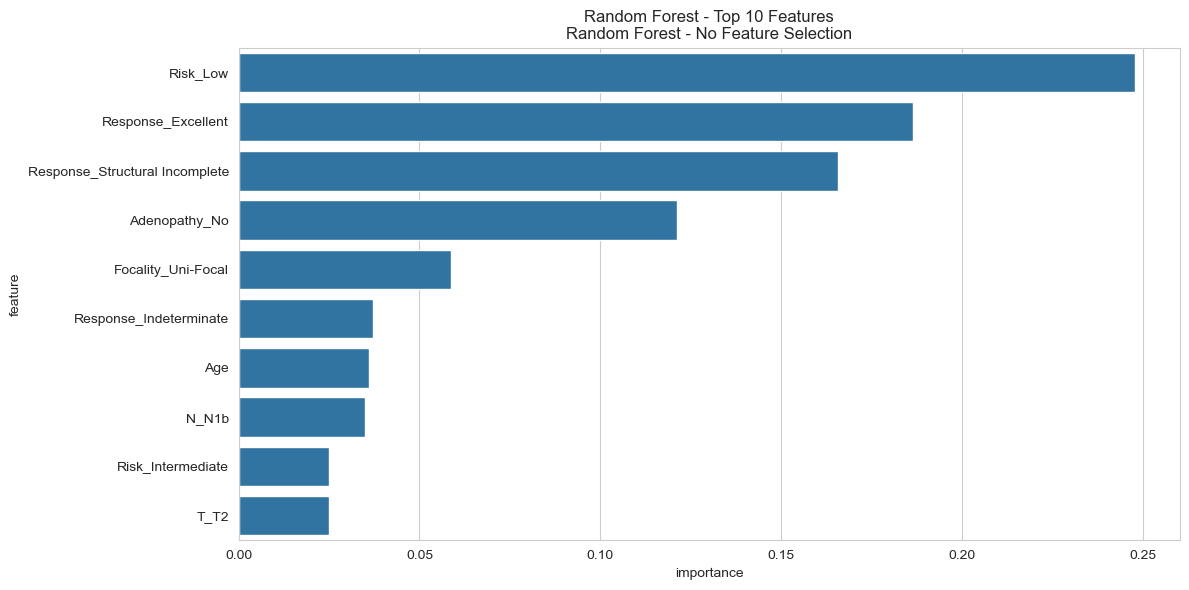

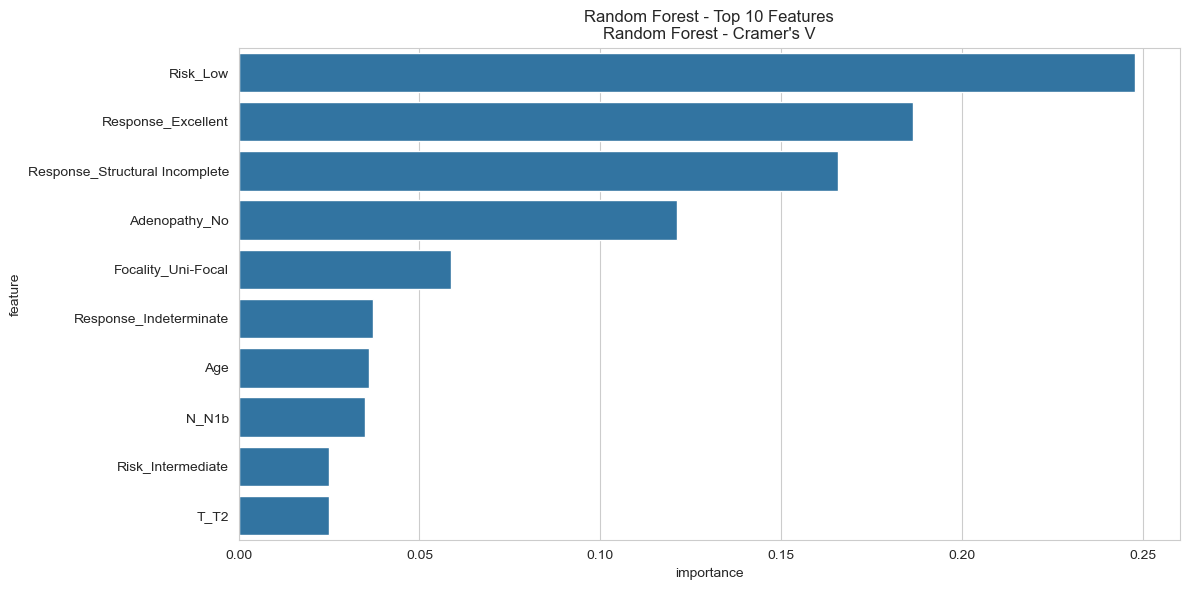


Expected 41 features, got 31


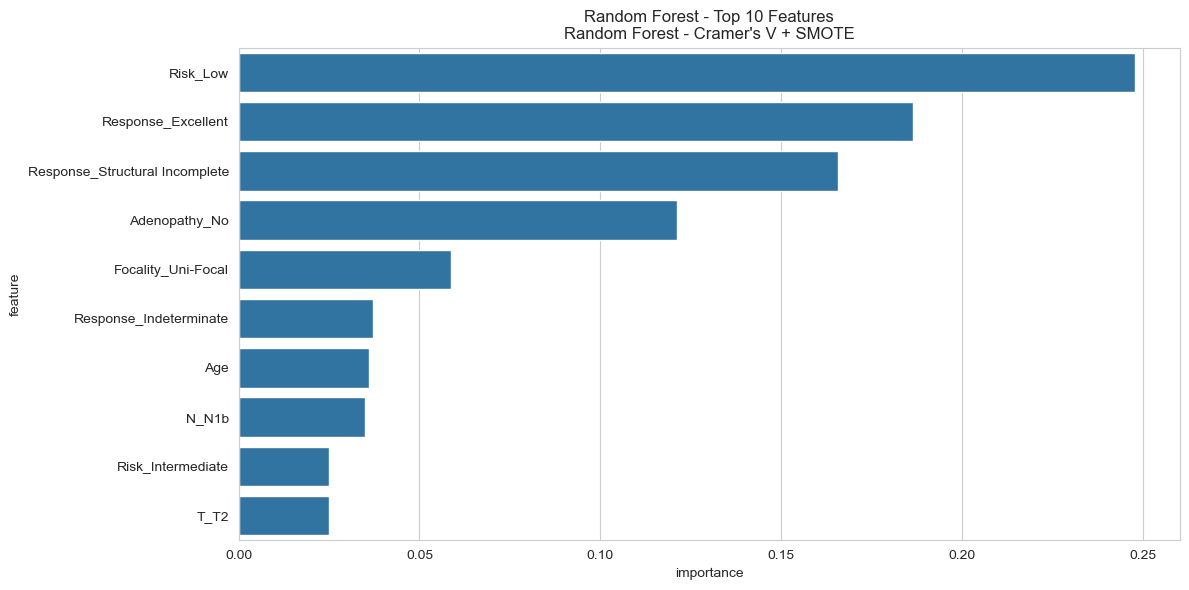

In [304]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1,
    verbose=1
)

# Dictionaries to store results and models
rf_results = {}
rf_models = {}  # Store trained models

def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    """Helper function to evaluate model and store results"""
    result = evaluate_model(
        model, 
        X_train, X_test, 
        y_train, y_test,
        name
    )
    # Store the trained model
    rf_models[name] = model
    return result

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - RANDOM FOREST")
print("="*80)
rf_results['No_FS'] = evaluate_and_store(
    rf_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'Random Forest - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - RANDOM FOREST")
print("="*80)
rf_results['Cramers'] = evaluate_and_store(
    rf_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'Random Forest - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - RANDOM FOREST")
print("="*80)
rf_results['No_FS_SMOTE'] = evaluate_and_store(
    rf_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'Random Forest - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - RANDOM FOREST")
print("="*80)
rf_results['Cramers_SMOTE'] = evaluate_and_store(
    rf_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'Random Forest - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
rf_results_list = []
for name, metrics in rf_results.items():
    if metrics is not None:
        rf_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if rf_results_list:
    rf_results_df = pd.DataFrame(rf_results_list)
    print("\n" + "="*80)
    print("RANDOM FOREST - SUMMARY OF RESULTS")
    print("="*80)
    print(rf_results_df.round(4))
    
    # Feature importance visualization
    for name, model in rf_models.items():
        if hasattr(model, 'feature_importances_'):
            # Get the feature names used during training
            if 'No_FS' in name or 'No FS' in name:
                feature_names = X_no_fs_train.columns
            else:
                feature_names = X_cramers_train.columns
                
            # Ensure we have the same number of features as importances
            if len(feature_names) == len(model.feature_importances_):
                importance = pd.DataFrame({
                    'feature': feature_names,
                    'importance': model.feature_importances_
                }).sort_values('importance', ascending=False)
                
                plt.figure(figsize=(12, 6))
                sns.barplot(x='importance', y='feature', data=importance.head(10))
                plt.title(f'Random Forest - Top 10 Features\n{name}')
                plt.tight_layout()
                plt.show()
            else:
                print(f"\nWarning: Mismatch in number of features for {name}")
                print(f"Expected {len(feature_names)} features, got {len(model.feature_importances_)}")
else:
    print("\nNo valid results to display for Random Forest.")

### **Naive Bayes**

In [305]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Dictionaries to store results and models
nb_results = {}
nb_models = {}  # Store trained models

def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    """Helper function to evaluate model and store results"""
    result = evaluate_model(
        model, 
        X_train, X_test, 
        y_train, y_test,
        name
    )
    # Store the trained model
    nb_models[name] = model
    return result

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - NAIVE BAYES")
print("="*80)
nb_results['No_FS'] = evaluate_and_store(
    nb_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'Naive Bayes - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - NAIVE BAYES")
print("="*80)
nb_results['Cramers'] = evaluate_and_store(
    nb_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'Naive Bayes - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - NAIVE BAYES")
print("="*80)
nb_results['No_FS_SMOTE'] = evaluate_and_store(
    nb_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'Naive Bayes - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - NAIVE BAYES")
print("="*80)
nb_results['Cramers_SMOTE'] = evaluate_and_store(
    nb_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'Naive Bayes - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
nb_results_list = []
for name, metrics in nb_results.items():
    if metrics is not None:
        nb_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if nb_results_list:
    nb_results_df = pd.DataFrame(nb_results_list)
    print("\n" + "="*80)
    print("NAIVE BAYES - SUMMARY OF RESULTS")
    print("="*80)
    print(nb_results_df.round(4))
else:
    print("\nNo valid results to display for Naive Bayes.")


1. NO FEATURE SELECTION - NAIVE BAYES

Evaluating Naive Bayes - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)

Model Performance:
Accuracy:  0.9455
Precision: 0.9452
Recall:    0.9455
F1-Score:  0.9450
ROC-AUC:   0.9626

Confusion Matrix:
[[75  2]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        77
           1       0.94      0.88      0.91        33

    accuracy                           0.95       110
   macro avg       0.94      0.93      0.93       110
weighted avg       0.95      0.95      0.94       110


2. CRAMER'S V FEATURE SELECTION - NAIVE BAYES

Evaluating Naive Bayes - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)

Model Performance:
Accuracy:  0.9364
Precision: 0.9363
Recall:    0.9364
F1-Score:  0.9355
ROC-AUC:   0.9669

Confusion Matrix:
[[75  2]
 [ 5 28]]

Classifi

#### **XGBoost**

In [306]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning)  # Suppress XGBoost warnings

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=len(y_no_fs_train[y_no_fs_train==0]) / len(y_no_fs_train[y_no_fs_train==1])  # Handle class imbalance
)

# Dictionaries to store results and models
xgb_results = {}
xgb_models = {}

def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    """Helper function to evaluate model and store results"""
    result = evaluate_model(
        model, 
        X_train, X_test, 
        y_train, y_test,
        name
    )
    # Store the trained model
    xgb_models[name] = model
    return result

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - XGBOOST")
print("="*80)
xgb_results['No_FS'] = evaluate_and_store(
    xgb_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'XGBoost - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - XGBOOST")
print("="*80)
xgb_results['Cramers'] = evaluate_and_store(
    xgb_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'XGBoost - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - XGBOOST")
print("="*80)
xgb_results['No_FS_SMOTE'] = evaluate_and_store(
    xgb_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'XGBoost - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - XGBOOST")
print("="*80)
xgb_results['Cramers_SMOTE'] = evaluate_and_store(
    xgb_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'XGBoost - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
xgb_results_list = []
for name, metrics in xgb_results.items():
    if metrics is not None:
        xgb_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if xgb_results_list:
    xgb_results_df = pd.DataFrame(xgb_results_list)
    print("\n" + "="*80)
    print("XGBOOST - SUMMARY OF RESULTS")
    print("="*80)
    print(xgb_results_df.round(4))
    

else:
    print("\nNo valid results to display for XGBoost.")


1. NO FEATURE SELECTION - XGBOOST

Evaluating XGBoost - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)

Model Performance:
Accuracy:  0.9545
Precision: 0.9551
Recall:    0.9545
F1-Score:  0.9547
ROC-AUC:   0.9890

Confusion Matrix:
[[74  3]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        77
           1       0.91      0.94      0.93        33

    accuracy                           0.95       110
   macro avg       0.94      0.95      0.95       110
weighted avg       0.96      0.95      0.95       110


2. CRAMER'S V FEATURE SELECTION - XGBOOST

Evaluating XGBoost - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)

Model Performance:
Accuracy:  0.9545
Precision: 0.9551
Recall:    0.9545
F1-Score:  0.9547
ROC-AUC:   0.9890

Confusion Matrix:
[[74  3]
 [ 2 31]]

Classification Report:
 

#### **AdaBoost**

In [307]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize base estimator (default is Decision Tree with max_depth=1)
base_estimator = DecisionTreeClassifier(
    max_depth=3,  # Slightly deeper trees than default
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Initialize AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Dictionaries to store results and models
ada_results = {}
ada_models = {}

def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    """Helper function to evaluate model and store results"""
    result = evaluate_model(
        model, 
        X_train, X_test, 
        y_train, y_test,
        name
    )
    # Store the trained model
    ada_models[name] = model
    return result

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - ADABOOST")
print("="*80)
ada_results['No_FS'] = evaluate_and_store(
    adaboost_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'AdaBoost - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - ADABOOST")
print("="*80)
ada_results['Cramers'] = evaluate_and_store(
    adaboost_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'AdaBoost - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - ADABOOST")
print("="*80)
ada_results['No_FS_SMOTE'] = evaluate_and_store(
    adaboost_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'AdaBoost - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - ADABOOST")
print("="*80)
ada_results['Cramers_SMOTE'] = evaluate_and_store(
    adaboost_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'AdaBoost - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
ada_results_list = []
for name, metrics in ada_results.items():
    if metrics is not None:
        ada_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if ada_results_list:
    ada_results_df = pd.DataFrame(ada_results_list)
    print("\n" + "="*80)
    print("ADABOOST - SUMMARY OF RESULTS")
    print("="*80)
    print(ada_results_df.round(4))

else:
    print("\nNo valid results to display for AdaBoost.")


1. NO FEATURE SELECTION - ADABOOST

Evaluating AdaBoost - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)


c:\Users\Marxel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance:
Accuracy:  0.9364
Precision: 0.9360
Recall:    0.9364
F1-Score:  0.9361
ROC-AUC:   0.9803

Confusion Matrix:
[[74  3]
 [ 4 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        77
           1       0.91      0.88      0.89        33

    accuracy                           0.94       110
   macro avg       0.93      0.92      0.92       110
weighted avg       0.94      0.94      0.94       110


2. CRAMER'S V FEATURE SELECTION - ADABOOST

Evaluating AdaBoost - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)


c:\Users\Marxel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance:
Accuracy:  0.9455
Precision: 0.9455
Recall:    0.9455
F1-Score:  0.9455
ROC-AUC:   0.9725

Confusion Matrix:
[[74  3]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        77
           1       0.91      0.91      0.91        33

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110


3. NO FS + SMOTE - ADABOOST

Evaluating AdaBoost - No FS + SMOTE...
Training shapes - X: (358, 41), y: (358,)
Test shapes     - X: (110, 41), y: (110,)


c:\Users\Marxel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance:
Accuracy:  0.9727
Precision: 0.9727
Recall:    0.9727
F1-Score:  0.9726
ROC-AUC:   0.9937

Confusion Matrix:
[[76  1]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        77
           1       0.97      0.94      0.95        33

    accuracy                           0.97       110
   macro avg       0.97      0.96      0.97       110
weighted avg       0.97      0.97      0.97       110


4. CRAMER'S V + SMOTE - ADABOOST

Evaluating AdaBoost - Cramer's V + SMOTE...
Training shapes - X: (358, 31), y: (358,)
Test shapes     - X: (110, 31), y: (110,)


c:\Users\Marxel\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model Performance:
Accuracy:  0.9455
Precision: 0.9470
Recall:    0.9455
F1-Score:  0.9459
ROC-AUC:   0.9890

Confusion Matrix:
[[73  4]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        77
           1       0.89      0.94      0.91        33

    accuracy                           0.95       110
   macro avg       0.93      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110


ADABOOST - SUMMARY OF RESULTS
         Dataset  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0          No_FS    0.9364     0.9360  0.9364    0.9361   0.9803
1        Cramers    0.9455     0.9455  0.9455    0.9455   0.9725
2    No_FS_SMOTE    0.9727     0.9727  0.9727    0.9726   0.9937
3  Cramers_SMOTE    0.9455     0.9470  0.9455    0.9459   0.9890


In [308]:
from catboost import CatBoostClassifier
import numpy as np

# Initialize CatBoost model
catboost_model = CatBoostClassifier(
    iterations=100,           # Number of boosting iterations
    learning_rate=0.1,        # Learning rate
    depth=6,                  # Depth of trees
    l2_leaf_reg=3,            # L2 regularization
    random_seed=42,           # For reproducibility
    verbose=0,                # Set to 0 to suppress output
    auto_class_weights='Balanced',  # Handle class imbalance
    task_type='CPU',          # Use CPU for training
    thread_count=-1           # Use all available CPU cores
)

# Dictionaries to store results and models
cat_results = {}
cat_models = {}

def evaluate_and_store(model, X_train, X_test, y_train, y_test, name):
    """Helper function to evaluate model and store results"""
    result = evaluate_model(
        model, 
        X_train, X_test, 
        y_train, y_test,
        name
    )
    # Store the trained model
    cat_models[name] = model
    return result

# 1. No feature selection
print("\n" + "="*80)
print("1. NO FEATURE SELECTION - CATBOOST")
print("="*80)
cat_results['No_FS'] = evaluate_and_store(
    catboost_model, 
    X_no_fs_train, X_no_fs_test, 
    y_no_fs_train, y_no_fs_test,
    'CatBoost - No Feature Selection'
)

# 2. Cramer's V feature selection
print("\n" + "="*80)
print("2. CRAMER'S V FEATURE SELECTION - CATBOOST")
print("="*80)
cat_results['Cramers'] = evaluate_and_store(
    catboost_model,
    X_cramers_train, X_cramers_test,
    y_cramers_train, y_cramers_test,
    'CatBoost - Cramer\'s V'
)

# 3. No FS + SMOTE
print("\n" + "="*80)
print("3. NO FS + SMOTE - CATBOOST")
print("="*80)
cat_results['No_FS_SMOTE'] = evaluate_and_store(
    catboost_model,
    X_nofs_smote_train, X_nofs_smote_test,
    y_nofs_smote_train, y_nofs_smote_test,
    'CatBoost - No FS + SMOTE'
)

# 4. Cramer's V + SMOTE
print("\n" + "="*80)
print("4. CRAMER'S V + SMOTE - CATBOOST")
print("="*80)
cat_results['Cramers_SMOTE'] = evaluate_and_store(
    catboost_model,
    X_cramers_smote_train, X_cramers_smote_test,
    y_cramers_smote_train, y_cramers_smote_test,
    'CatBoost - Cramer\'s V + SMOTE'
)

# Create summary DataFrame
cat_results_list = []
for name, metrics in cat_results.items():
    if metrics is not None:
        cat_results_list.append({
            'Dataset': name,
            'Accuracy': metrics['accuracy'],
            'Precision': metrics['precision'],
            'Recall': metrics['recall'],
            'F1-Score': metrics['f1'],
            'ROC-AUC': metrics.get('roc_auc', None)
        })

if cat_results_list:
    cat_results_df = pd.DataFrame(cat_results_list)
    print("\n" + "="*80)
    print("CATBOOST - SUMMARY OF RESULTS")
    print("="*80)
    print(cat_results_df.round(4))
else:
    print("\nNo valid results to display for CatBoost.")


1. NO FEATURE SELECTION - CATBOOST

Evaluating CatBoost - No Feature Selection...
Training shapes - X: (254, 41), y: (254,)
Test shapes     - X: (110, 41), y: (110,)

Model Performance:
Accuracy:  0.9636
Precision: 0.9636
Recall:    0.9636
F1-Score:  0.9636
ROC-AUC:   0.9815

Confusion Matrix:
[[75  2]
 [ 2 31]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        77
           1       0.94      0.94      0.94        33

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110


2. CRAMER'S V FEATURE SELECTION - CATBOOST

Evaluating CatBoost - Cramer's V...
Training shapes - X: (254, 31), y: (254,)
Test shapes     - X: (110, 31), y: (110,)

Model Performance:
Accuracy:  0.9545
Precision: 0.9551
Recall:    0.9545
F1-Score:  0.9547
ROC-AUC:   0.9870

Confusion Matrix:
[[74  3]
 [ 2 31]]

Classification Repor

### IV. **Model evaluation**


COMBINED MODEL RESULTS


,Model,Dataset,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,No_FS,0.9364,0.9394,0.9364,0.9371,0.9756
1,Logistic Regression,Cramers,0.9273,0.9322,0.9273,0.9284,0.9787
2,Logistic Regression,No_FS_SMOTE,0.9364,0.9394,0.9364,0.9371,0.9811
3,Logistic Regression,Cramers_SMOTE,0.9455,0.9470,0.9455,0.9459,0.9854
4,Decision Tree,No_FS,0.9273,0.9291,0.9273,0.9279,0.9463
5,Decision Tree,Cramers,0.9364,0.9371,0.9364,0.9366,0.9601
6,Decision Tree,No_FS_SMOTE,0.9545,0.9551,0.9545,0.9547,0.9543
7,Decision Tree,Cramers_SMOTE,0.9545,0.9551,0.9545,0.9547,0.9542
8,Random Forest,No_FS,0.9545,0.9543,0.9545,0.9543,0.9795
9,Random Forest,Cramers,0.9455,0.9455,0.9455,0.9455,0.9811



MODEL RANKING (Lower is better)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Average_Rank
Model,,,,,,
CatBoost,1.5,1.0,1.5,1.0,2.0,1.4
XGBoost,1.5,2.0,1.5,2.0,1.0,1.6
AdaBoost,3.0,3.0,3.0,3.0,3.0,3.0
Random Forest,4.0,4.0,4.0,4.0,4.0,4.0
Decision Tree,5.0,5.0,5.0,5.0,7.0,5.4
Naive Bayes,6.0,6.0,6.0,6.0,6.0,6.0
Logistic Regression,7.0,7.0,7.0,7.0,5.0,6.6


<Figure size 1400x800 with 0 Axes>

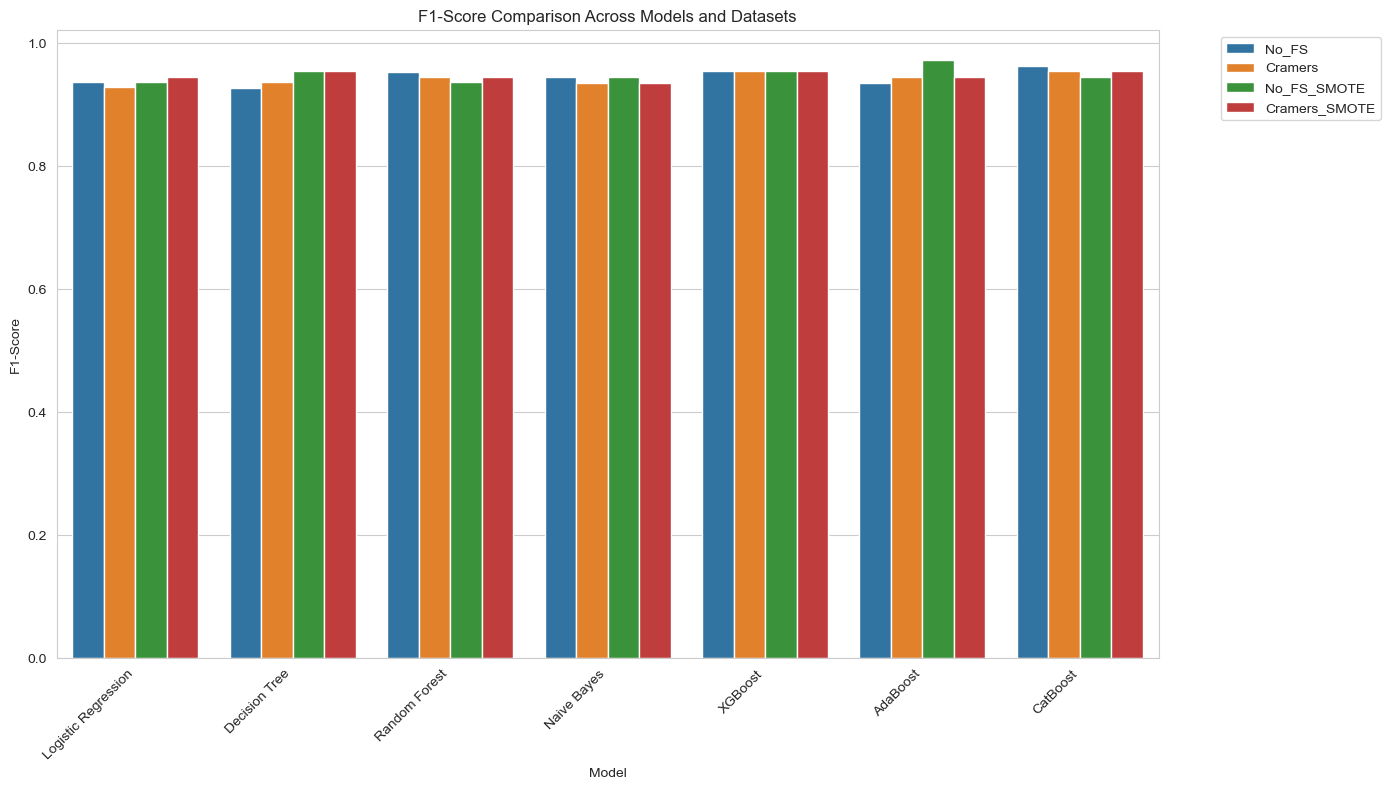

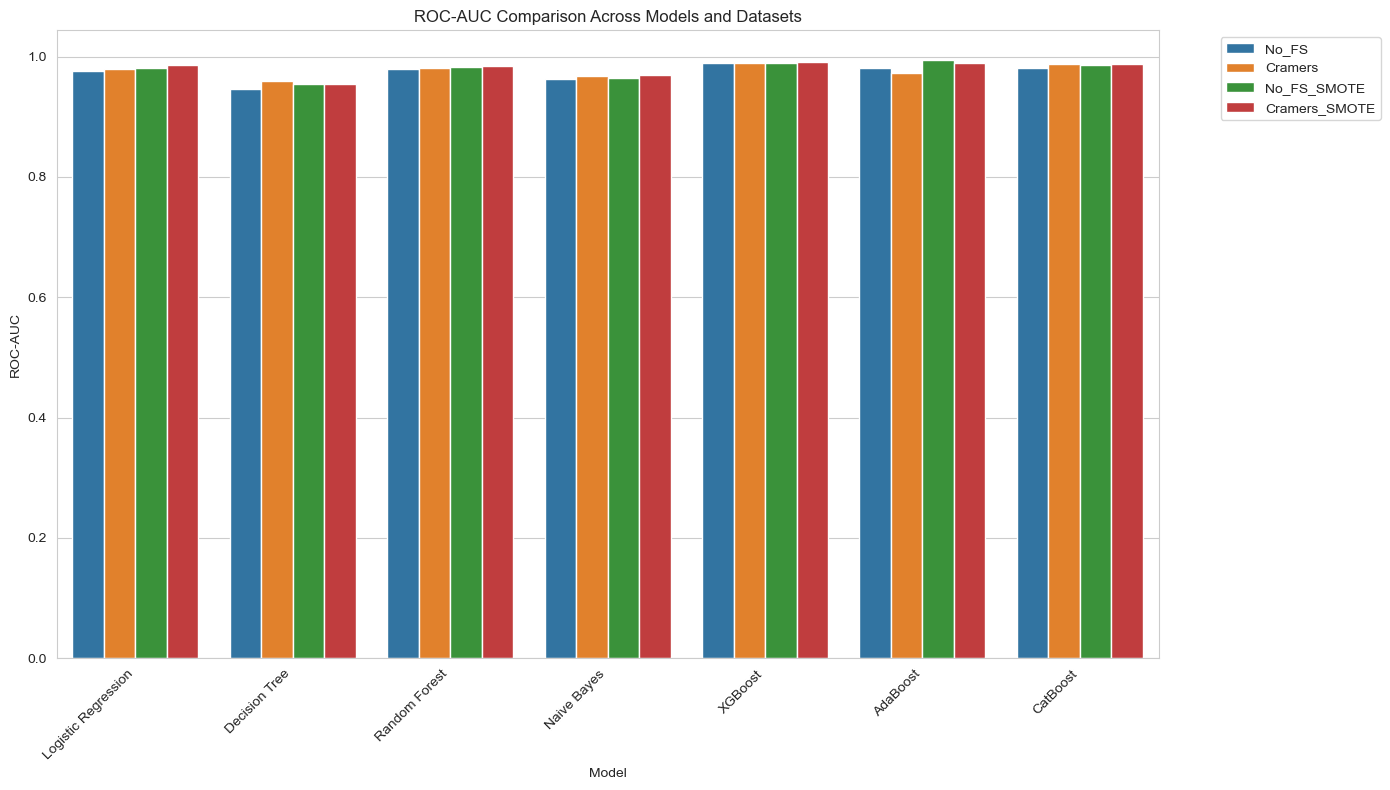


BEST MODEL PER DATASET

Dataset: No_FS
Best F1-Score: CatBoost (0.9636)
Best ROC-AUC:  XGBoost (0.9890)

Dataset: Cramers
Best F1-Score: XGBoost (0.9547)
Best ROC-AUC:  XGBoost (0.9890)

Dataset: No_FS_SMOTE
Best F1-Score: AdaBoost (0.9726)
Best ROC-AUC:  AdaBoost (0.9937)

Dataset: Cramers_SMOTE
Best F1-Score: Decision Tree (0.9547)
Best ROC-AUC:  XGBoost (0.9902)

OVERALL BEST MODEL (based on average F1-Score): CatBoost


In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming we have these results dataframes from previous runs
# If not, you'll need to collect them from your model results
all_results = {
    'Logistic Regression': lr_results_df,
    'Decision Tree': dt_results_df,
    'Random Forest': rf_results_df,
    'Naive Bayes': nb_results_df,
    'XGBoost': xgb_results_df,
    'AdaBoost': ada_results_df,
    'CatBoost': cat_results_df
}

# Create a combined dataframe
combined_df = pd.DataFrame()

for model_name, df in all_results.items():
    df['Model'] = model_name
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Reorder columns for better readability
combined_df = combined_df[['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']]

# Display the combined results
print("\n" + "="*100)
print("COMBINED MODEL RESULTS")
print("="*100)
display(combined_df.round(4))

# Create a ranking system
def rank_models(df, metric, ascending=False):
    """Rank models based on a specific metric"""
    return df.sort_values(by=metric, ascending=ascending)[['Model', 'Dataset', metric]]

# Calculate average ranks across all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
rankings = {}

for metric in metrics:
    rankings[metric] = combined_df.groupby('Model')[metric].mean().rank(ascending=False)

# Create a summary ranking
summary_ranking = pd.DataFrame(rankings)
summary_ranking['Average_Rank'] = summary_ranking.mean(axis=1)
summary_ranking = summary_ranking.sort_values('Average_Rank')

# Display the ranking
print("\n" + "="*100)
print("MODEL RANKING (Lower is better)")
print("="*100)
display(summary_ranking.round(2))

# Visualize the results
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Plot F1-Score comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='F1-Score', hue='Dataset', data=combined_df)
plt.title('F1-Score Comparison Across Models and Datasets')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot ROC-AUC comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='ROC-AUC', hue='Dataset', data=combined_df)
plt.title('ROC-AUC Comparison Across Models and Datasets')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Best model per dataset
print("\n" + "="*100)
print("BEST MODEL PER DATASET")
print("="*100)

for dataset in combined_df['Dataset'].unique():
    best_f1 = combined_df[combined_df['Dataset'] == dataset].nlargest(1, 'F1-Score')
    best_auc = combined_df[combined_df['Dataset'] == dataset].nlargest(1, 'ROC-AUC')
    
    print(f"\nDataset: {dataset}")
    print(f"Best F1-Score: {best_f1['Model'].values[0]} ({best_f1['F1-Score'].values[0]:.4f})")
    print(f"Best ROC-AUC:  {best_auc['Model'].values[0]} ({best_auc['ROC-AUC'].values[0]:.4f})")

# Overall best model
overall_best = combined_df.groupby('Model')['F1-Score'].mean().idxmax()
print("\n" + "="*100)
print(f"OVERALL BEST MODEL (based on average F1-Score): {overall_best}")
print("="*100)

### V. **Explainable AI**

### **SHAP**

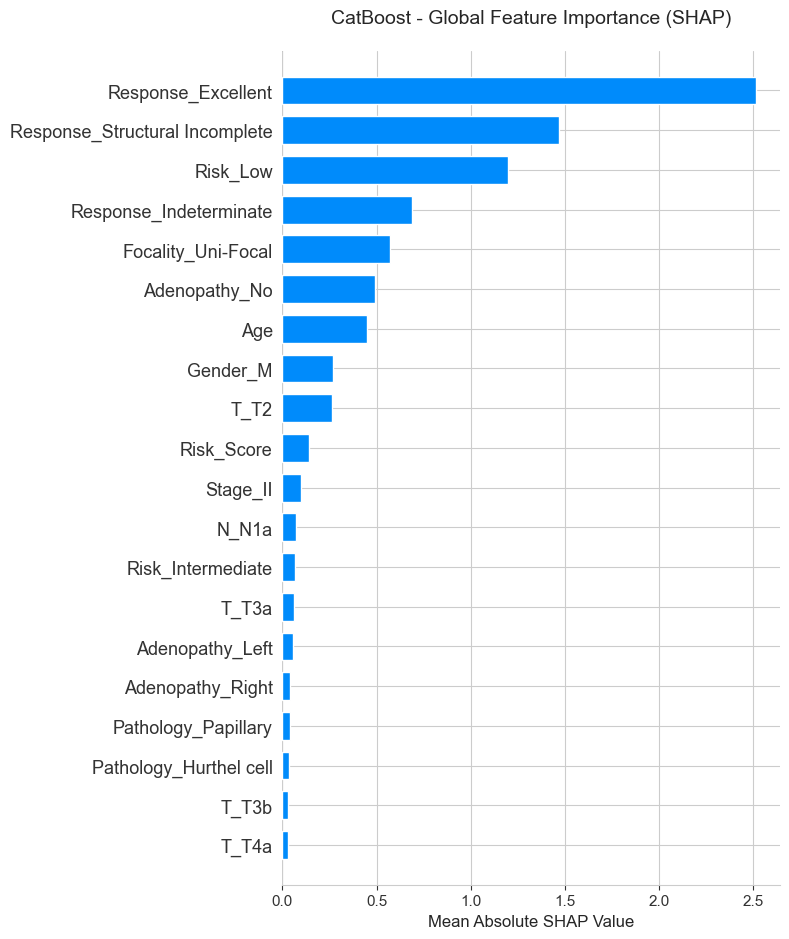

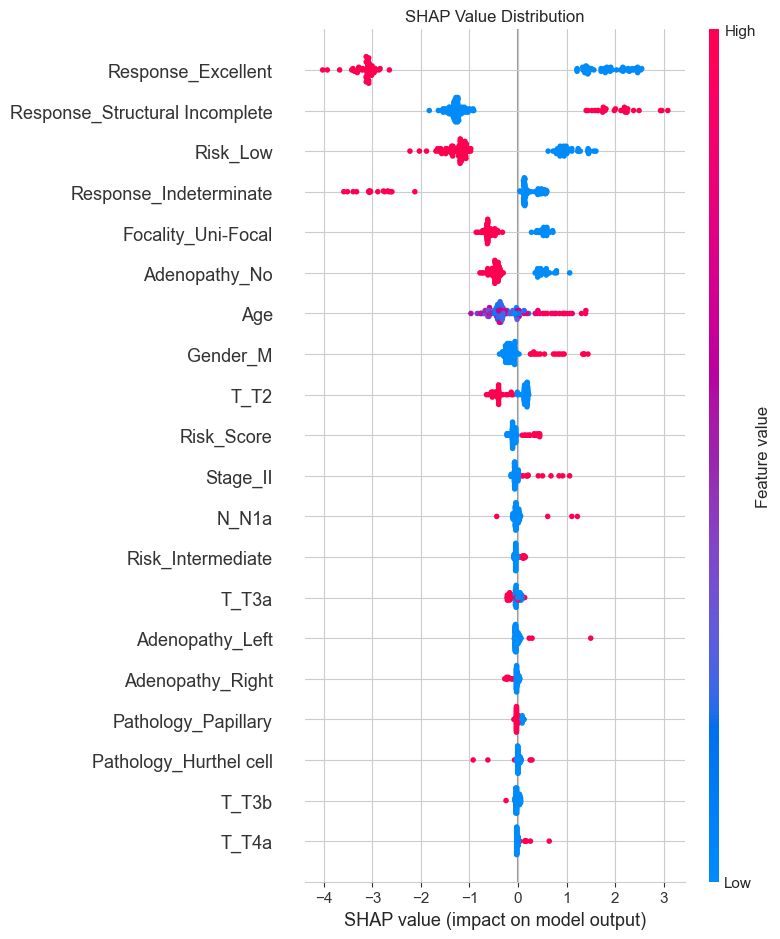

<Figure size 1000x600 with 0 Axes>

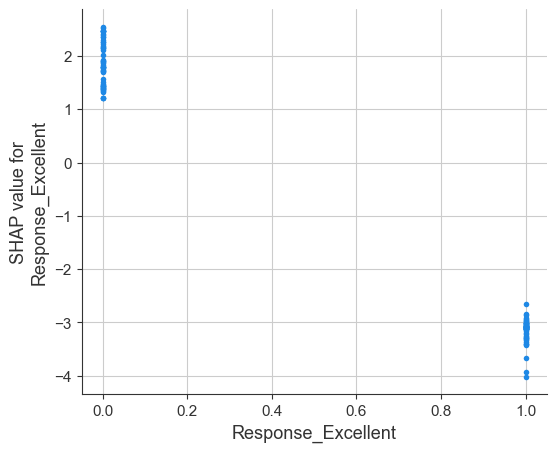

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

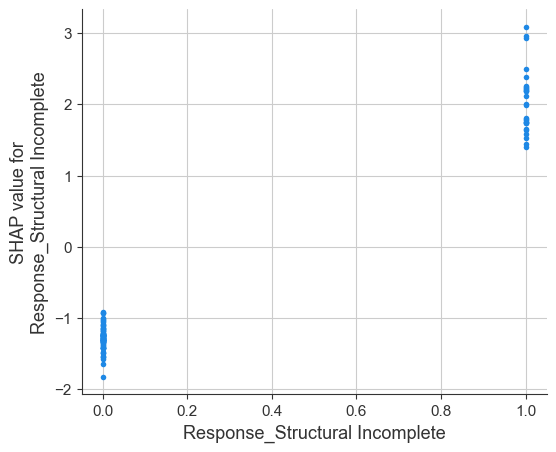

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

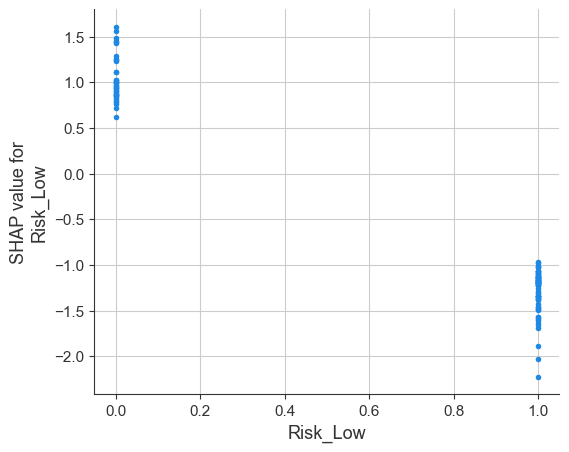

<Figure size 640x480 with 0 Axes>

Instance 0 - Actual: 1


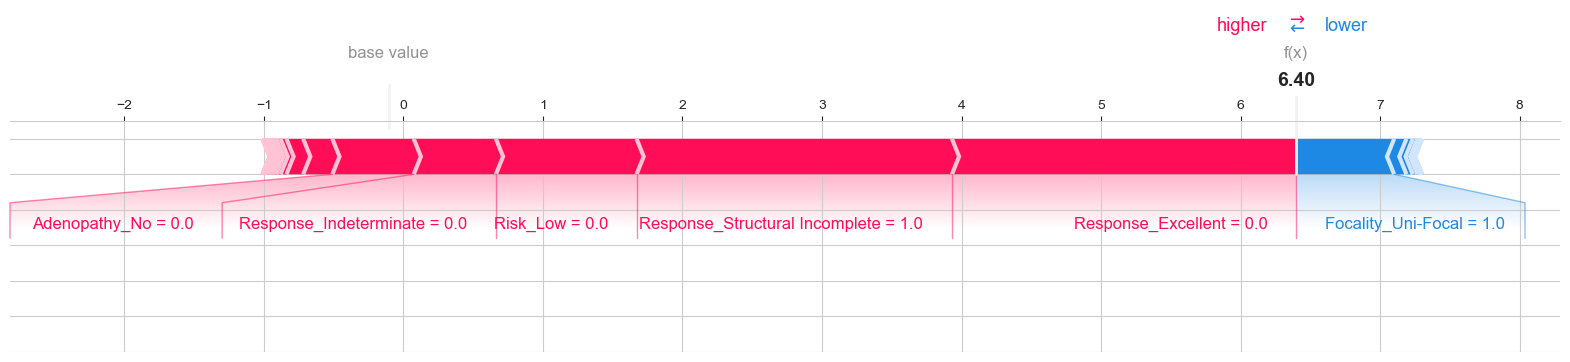

Instance 1 - Actual: 0


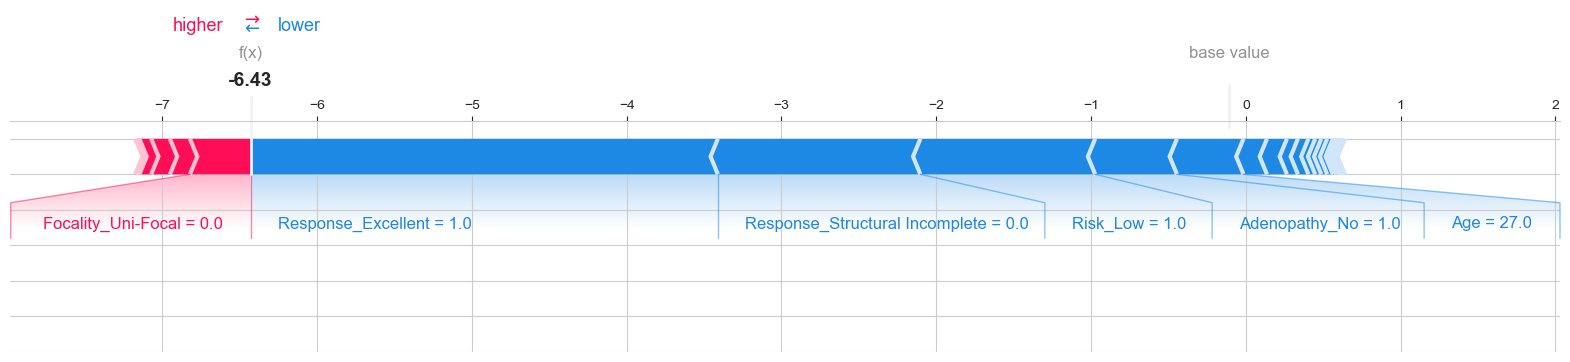

Instance 2 - Actual: 0


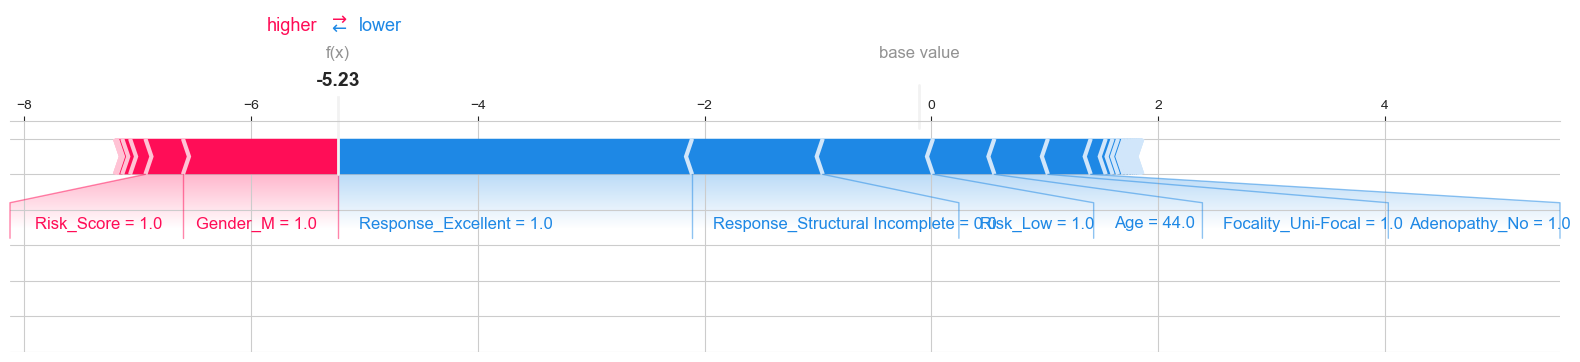

In [310]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Get the best model
best_model = cat_models["CatBoost - Cramer's V + SMOTE"]

# Get the corresponding dataset
X_train = X_cramers_smote_train
X_test = X_cramers_smote_test
feature_names = X_cramers_smote_train.columns

# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# 1. Global Feature Importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, plot_type="bar", show=False)
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.title('CatBoost - Global Feature Importance (SHAP)', pad=20, fontsize=14)
plt.tight_layout()
plt.show()

# 2. SHAP Summary Plot (beeswarm plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_names, show=False)
plt.title('SHAP Value Distribution')
plt.tight_layout()
plt.show()

# 3. SHAP Dependence Plots for Top Features
top_features = pd.DataFrame({
    'feature': feature_names,
    'importance': np.abs(shap_values).mean(0)
}).sort_values('importance', ascending=False).head(3)['feature']

for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(
        feature, 
        shap_values, 
        X_test, 
        feature_names=feature_names,
        interaction_index=None
    )
    plt.tight_layout()
    plt.show()

# 4. SHAP Force Plot for Individual Predictions
def show_force_plot(instance_idx):
    print(f"Instance {instance_idx} - Actual: {y_cramers_smote_test.iloc[instance_idx]}")
    return shap.force_plot(
        explainer.expected_value,
        shap_values[instance_idx],
        X_test.iloc[instance_idx],
        feature_names=feature_names,
        matplotlib=True
    )

# Show for first few instances
for i in range(3):
    show_force_plot(i)
    plt.show()

### **LIME**

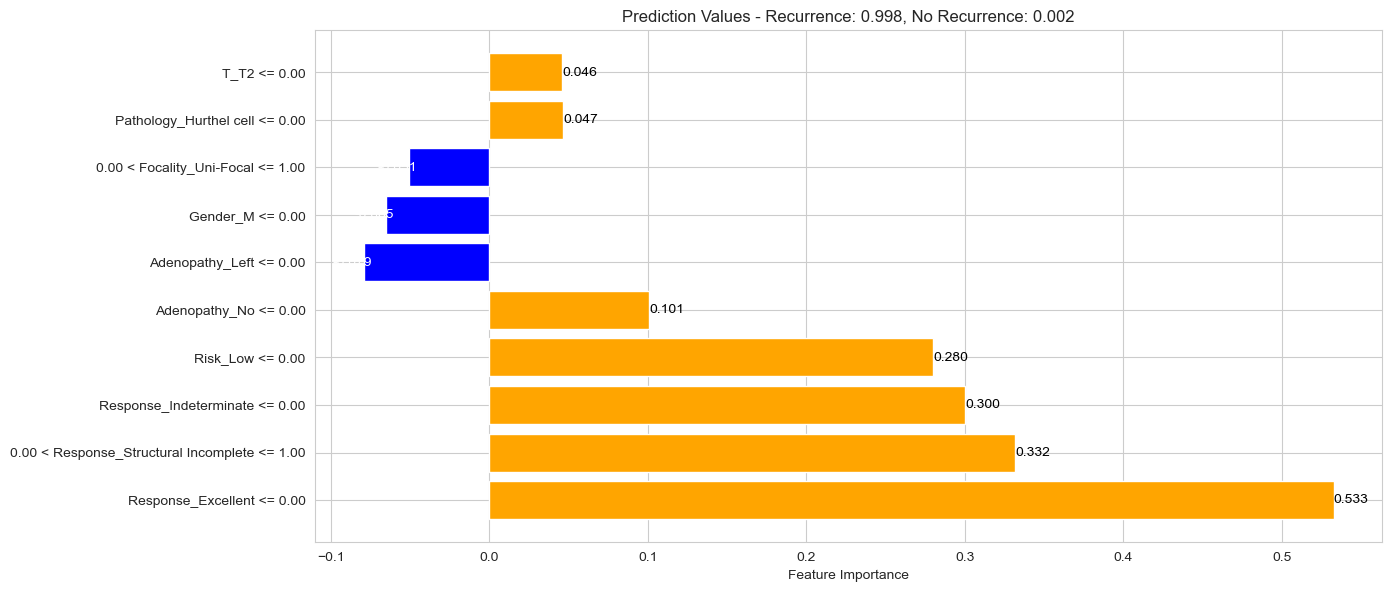

In [311]:
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['No Recurrence', 'Recurrence'],
    mode='classification',
    random_state=42
)

def explain_instance_lime(instance_idx, num_features=10):
    """Explain a single instance using LIME with improved visualization"""
    try:
        # Get the instance
        instance = X_test.iloc[instance_idx]
        actual_label = y_cramers_smote_test.iloc[instance_idx]
        
        # Get prediction
        pred_proba = best_model.predict_proba([instance])[0]
        pred_class = np.argmax(pred_proba)
        
        # Get explanation
        exp = explainer.explain_instance(
            instance.values, 
            best_model.predict_proba, 
            num_features=num_features,
            top_labels=2
        )
        
        # Create a figure with two subplots
        fig, ax1 = plt.subplots(1, 1, figsize=(14, 6))
        
        # Plot 1: LIME explanation
        exp.as_pyplot_figure(label=pred_class)
        plt.close()  # Close the auto-generated figure
        
        # Recreate the plot with better formatting
        exp_list = exp.as_list(label=pred_class)
        features = [x[0] for x in exp_list]
        values = [x[1] for x in exp_list]
        
        colors = ['orange' if v > 0 else 'blue' for v in values]
        y_pos = np.arange(len(features))
        
        ax1.barh(y_pos, values, color=colors)
        ax1.set_yticks(y_pos)
        ax1.set_yticklabels(features)
        ax1.set_title(f'Prediction Values - Recurrence: {pred_proba[1]:.3f}, No Recurrence: {pred_proba[0]:.3f}')
        ax1.set_xlabel('Feature Importance')
        
        # Add value labels
        for i, v in enumerate(values):
            ax1.text(v if v > 0 else v - 0.02, 
                    i, 
                    f"{v:.3f}",
                    color='black' if v > 0 else 'white',
                    va='center')
        
        plt.tight_layout(pad=1.0)
        plt.show()
        
    except Exception as e:
        print(f"Error generating explanation: {str(e)}")
        return None

explain_instance_lime(0)  # Show first instance

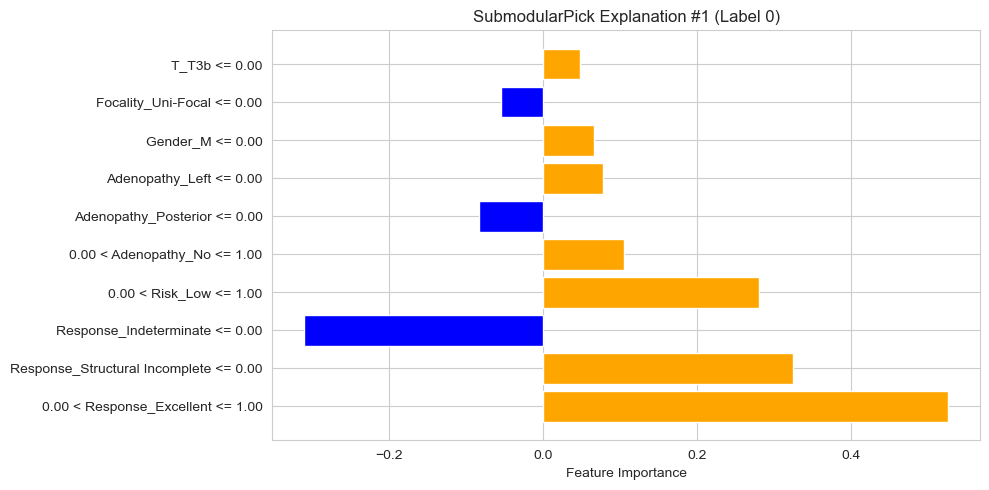

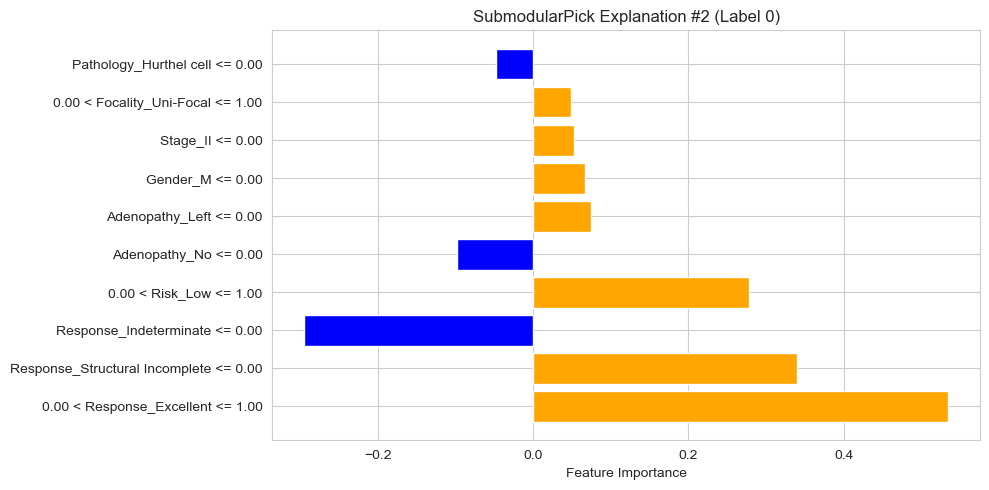

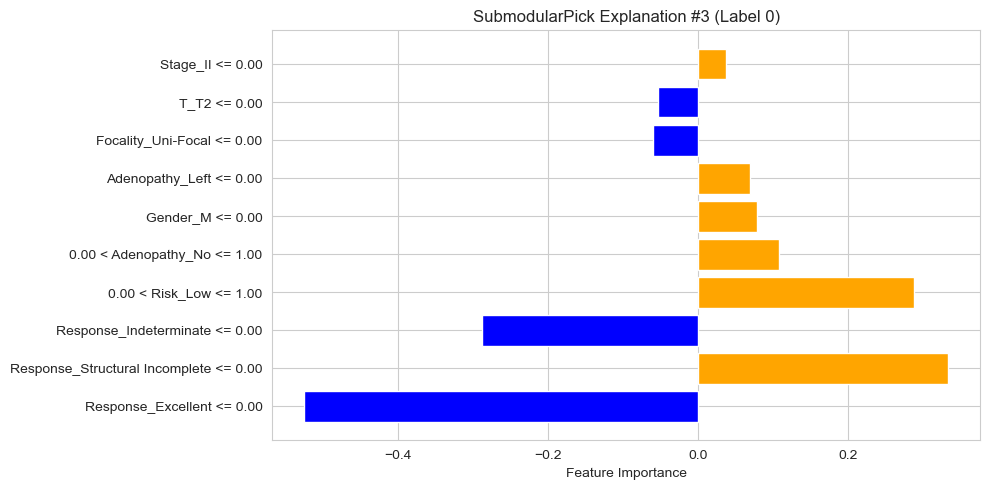

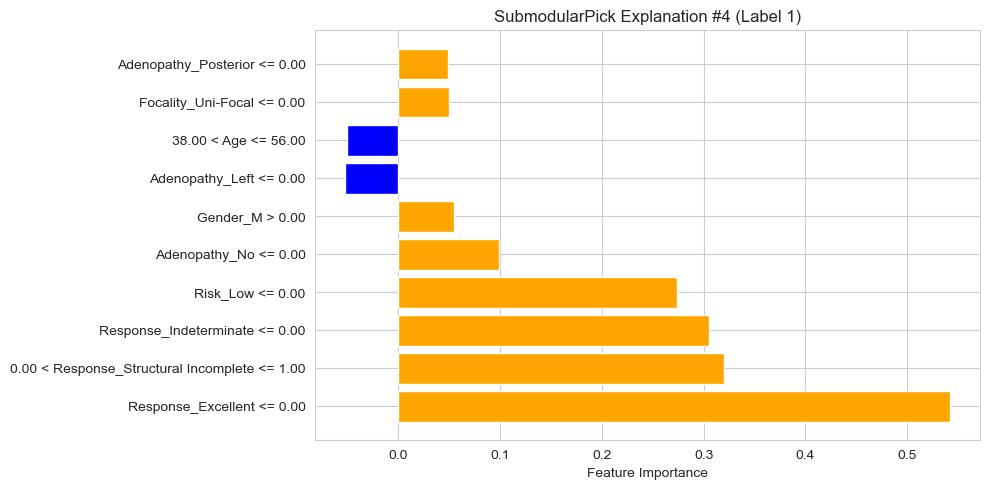

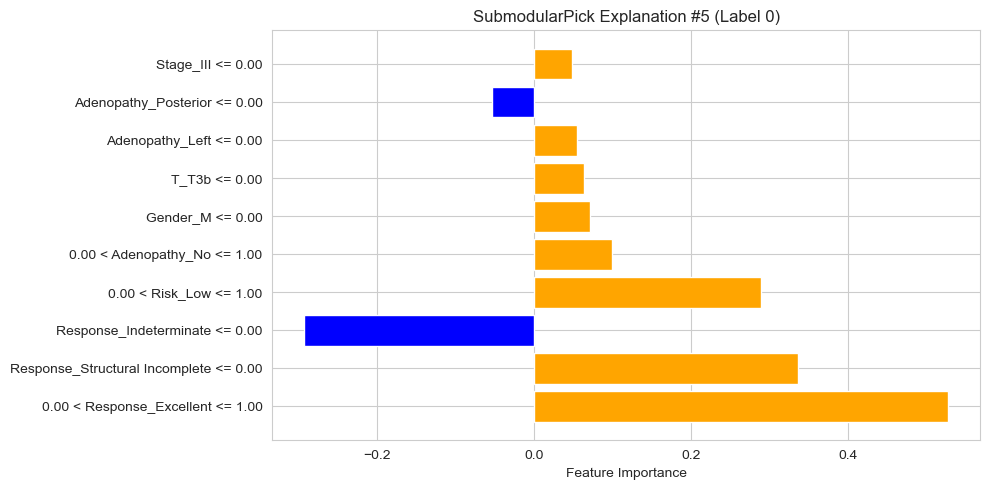

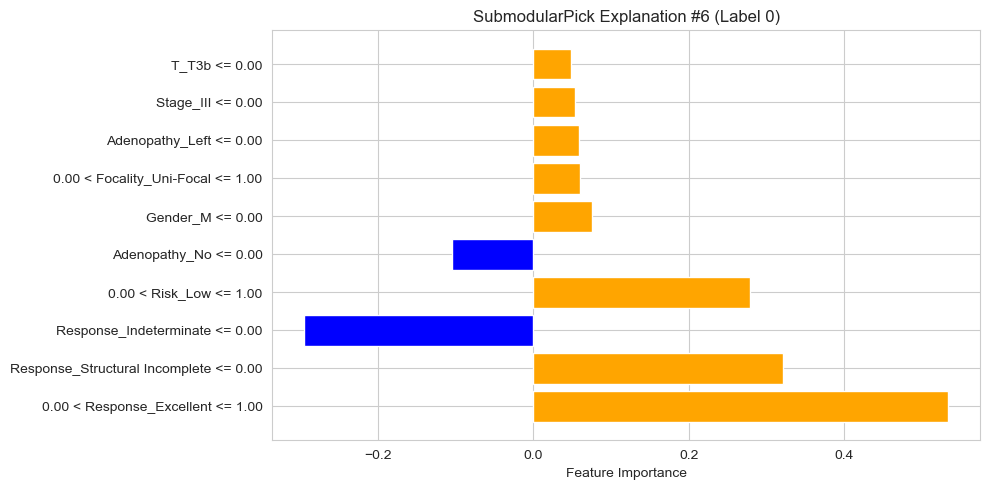

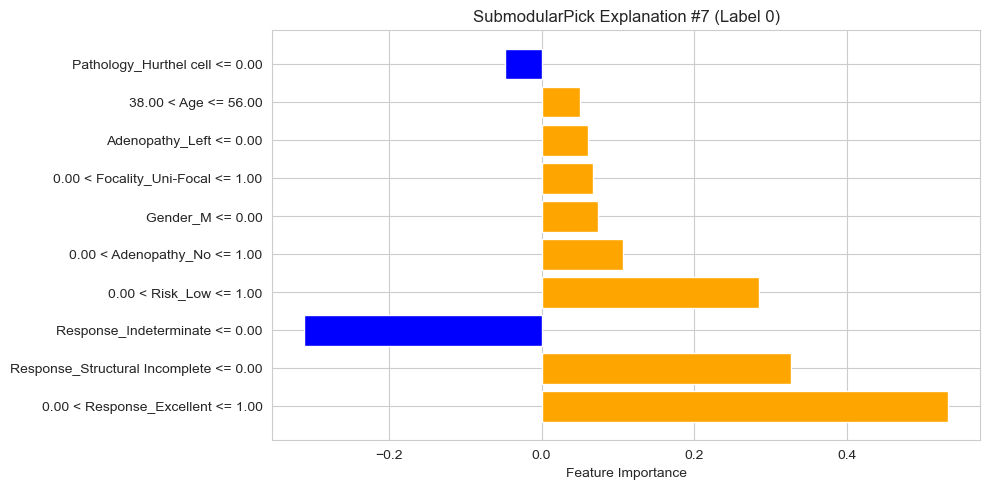

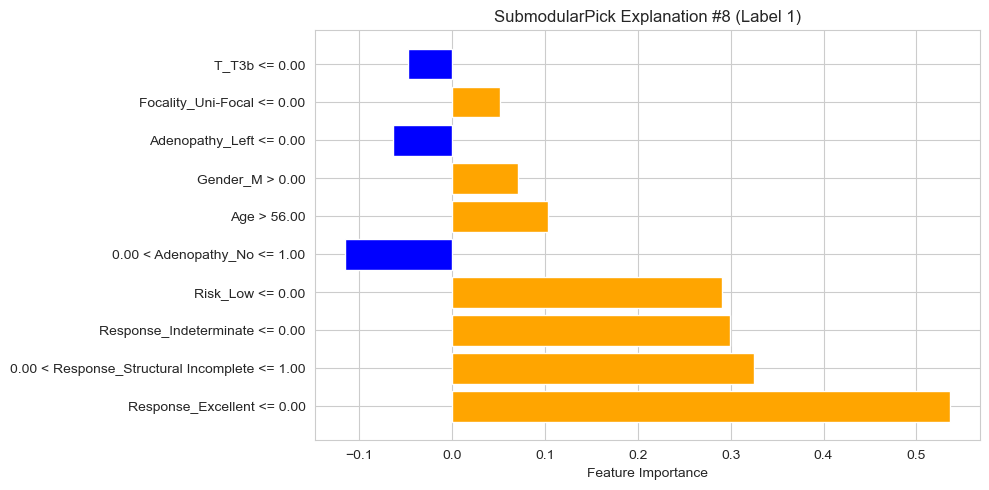

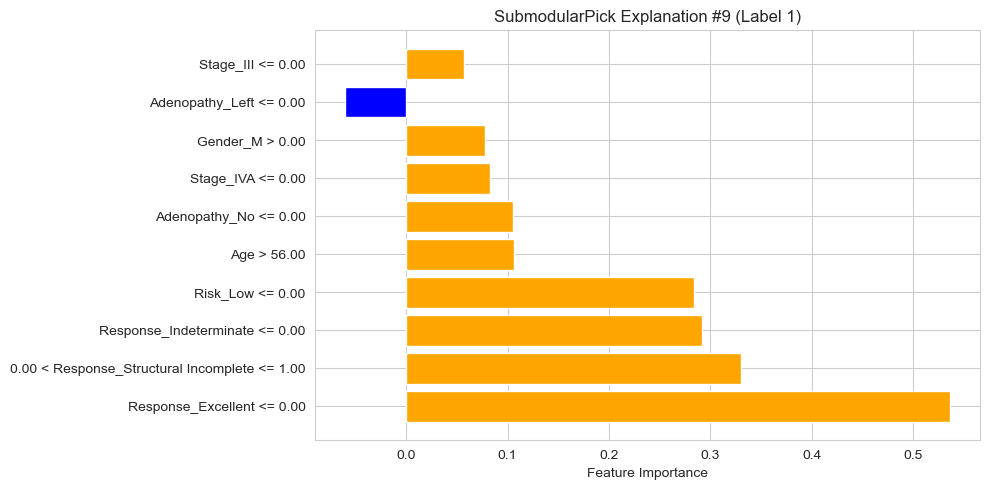

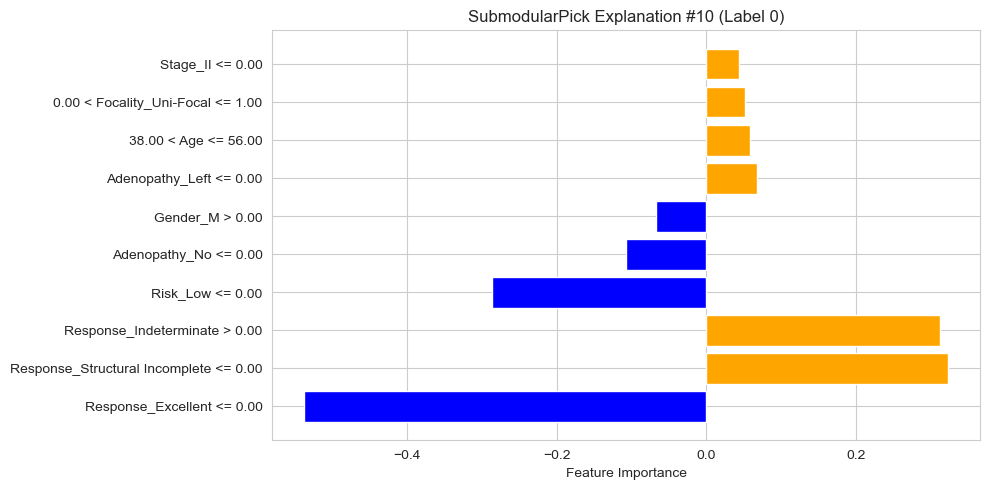

In [312]:
from lime import submodular_pick
import matplotlib.pyplot as plt

# Use SubmodularPick to select representative explanations
sp_obj = submodular_pick.SubmodularPick(
    explainer, X_cramers_smote_test.values, best_model.predict_proba, sample_size=10, num_features=10, num_exps_desired=5
)

# Plot the as_list() results for each selected explanation
for i, exp in enumerate(sp_obj.explanations):
    label = list(exp.local_exp.keys())[0]  # Get the first (available) label
    exp_list = exp.as_list(label=label)
    
    features = [x[0] for x in exp_list]
    values = [x[1] for x in exp_list]
    colors = ['orange' if v > 0 else 'blue' for v in values]
    y_pos = range(len(features))
    
    plt.figure(figsize=(10, 5))
    plt.barh(y_pos, values, color=colors)
    plt.yticks(y_pos, features)
    plt.xlabel('Feature Importance')
    plt.title(f'SubmodularPick Explanation #{i+1} (Label {label})')
    plt.tight_layout()
    plt.show()


In [313]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Create tabs for SHAP and LIME
tab = widgets.Tab()
shap_out = widgets.Output()
lime_out = widgets.Output()

tab.children = [shap_out, lime_out]
tab.set_title(0, 'SHAP Explanation')
tab.set_title(1, 'LIME Explanation')

# Create slider
instance_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=min(20, len(X_test)-1),  # Limit to first 20 instances for performance
    step=1,
    description='Instance:',
    continuous_update=False
)

# Create update functions
def update_shap(instance_idx):
    with shap_out:
        clear_output(wait=True)
        print(f"SHAP Explanation for Instance {instance_idx}")
        print(f"Actual Label: {y_cramers_smote_test.iloc[instance_idx]}")
        
        # Create SHAP explainer and get values
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test.iloc[instance_idx:instance_idx+1])
        
        # Force plot
        shap.force_plot(
            explainer.expected_value,
            shap_values,
            X_test.iloc[instance_idx:instance_idx+1],
            feature_names=feature_names,
            matplotlib=True,
            show=False
        )
        plt.tight_layout()
        plt.show()

def update_lime(instance_idx):
    with lime_out:
        clear_output(wait=True)
        explain_instance_lime(instance_idx)

def on_slider_change(change):
    instance_idx = change['new']
    update_shap(instance_idx)
    update_lime(instance_idx)

# Set up observer
instance_slider.observe(on_slider_change, names='value')

# Initial display
display(widgets.VBox([
    instance_slider,
    tab
]))

# Show initial visualizations
update_shap(0)
update_lime(0)